In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('Dataset link/Placement_Data_Full_Class.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df['salary'].fillna(0, inplace=True)

In [ ]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [ ]:
encoding_info = {}
for col, le in label_encoders.items():
    encoding_info[col] = dict(zip(le.classes_, le.transform(le.classes_)))

encoding_info

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

## Prepare data for modeling

In [ ]:
X = df.drop(['sl_no', 'status', 'salary'], axis=1)
y_status = df['status']
X_train, X_test, y_train_status, y_test_status = train_test_split(X, y_status, test_size=0.2, random_state=42)

In [ ]:
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [ ]:
y_status.head()

,status
0,1
1,1
2,1
3,0
4,1


## Modelling + Bias Detection
- Logistic Regression
- Random Forest

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

models_status = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    # 'Random Forest': RandomForestClassifier(random_state=42),
}

In [ ]:
from sklearn.metrics import classification_report
for name, model in models_status.items():
    model.fit(X_train, y_train_status)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test_status, predictions)
    print(f'{name} Accuracy: {accuracy:.2f}')

    report = classification_report(y_test_status, predictions)
    print(report)
    print()

Logistic Regression Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43




In [ ]:
X_test.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
200,1,69.0,1,60.0,1,1,65.0,0,0,87.55,0,52.81
212,1,67.0,1,67.0,1,1,73.0,0,1,59.00,0,69.72
138,0,82.0,1,64.0,1,2,73.0,2,1,96.00,0,71.77
176,0,59.0,0,60.0,1,1,56.0,0,0,55.00,1,57.90
15,0,65.0,0,75.0,0,1,69.0,0,1,72.00,0,64.66


In [ ]:
predictions

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
len(X_test)

43

In [ ]:
len(predictions)

43

In [ ]:
X_test_prediction_LR = X_test.copy()

In [ ]:
X_test_prediction_LR['predictions'] = predictions

In [ ]:
X_test_prediction_LR.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,predictions
200,1,69.0,1,60.0,1,1,65.0,0,0,87.55,0,52.81,1
212,1,67.0,1,67.0,1,1,73.0,0,1,59.00,0,69.72,1
138,0,82.0,1,64.0,1,2,73.0,2,1,96.00,0,71.77,1
176,0,59.0,0,60.0,1,1,56.0,0,0,55.00,1,57.90,0
15,0,65.0,0,75.0,0,1,69.0,0,1,72.00,0,64.66,1


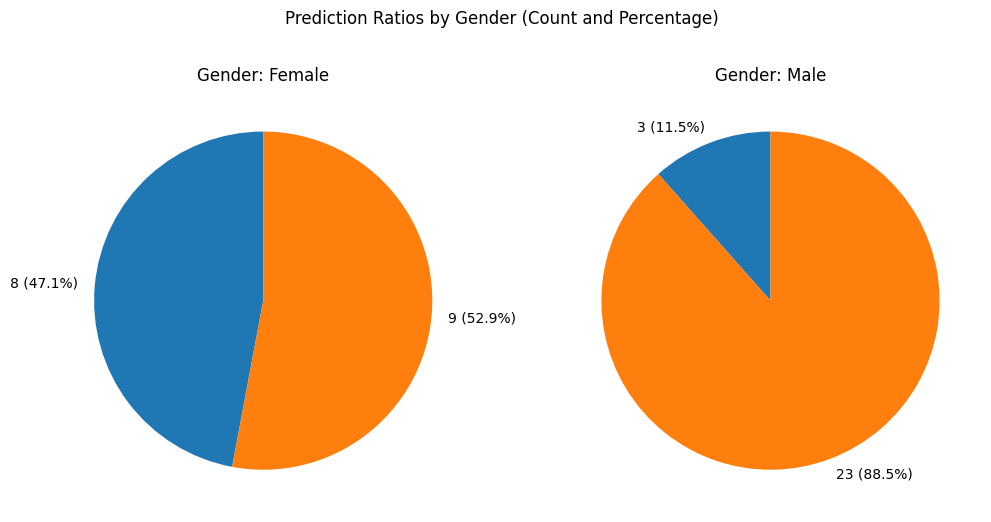

In [ ]:
import matplotlib.pyplot as plt

# Calculate the prediction counts and ratios based on gender
gender_prediction_counts = X_test_prediction_LR['predictions'].groupby(X_test_prediction_LR['gender']).value_counts(normalize=False).unstack()
gender_prediction_ratios = X_test_prediction_LR['predictions'].groupby(X_test_prediction_LR['gender']).value_counts(normalize=True).unstack()

# Plotting pie charts for each gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, gender in enumerate(gender_prediction_counts.index):
    counts = gender_prediction_counts.loc[gender]
    ratios = gender_prediction_ratios.loc[gender]
    labels = [f'{count} ({ratio:.1%})' for count, ratio in zip(counts, ratios)]

    axes[i].pie(counts, labels=labels, autopct=None, startangle=90)
    axes[i].set_title(f'Gender: {"Male" if gender == 1 else "Female"}')

plt.suptitle('Prediction Ratios by Gender (Count and Percentage)')
plt.show()


In [ ]:
models_status = {
    # 'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
}

In [ ]:
from sklearn.metrics import classification_report
for name, model in models_status.items():
    model.fit(X_train, y_train_status)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test_status, predictions)
    print(f'{name} Accuracy: {accuracy:.2f}')

    report = classification_report(y_test_status, predictions)
    print(report)
    print()

Random Forest Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.82      0.90      0.86        31

    accuracy                           0.79        43
   macro avg       0.75      0.70      0.72        43
weighted avg       0.78      0.79      0.78        43




In [ ]:
X_test.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
200,1,69.0,1,60.0,1,1,65.0,0,0,87.55,0,52.81
212,1,67.0,1,67.0,1,1,73.0,0,1,59.00,0,69.72
138,0,82.0,1,64.0,1,2,73.0,2,1,96.00,0,71.77
176,0,59.0,0,60.0,1,1,56.0,0,0,55.00,1,57.90
15,0,65.0,0,75.0,0,1,69.0,0,1,72.00,0,64.66


In [ ]:
predictions

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
len(X_test)

43

In [ ]:
len(predictions)

43

In [ ]:
X_test_prediction_RF = X_test.copy()

In [ ]:
X_test_prediction_RF['predictions'] = predictions

In [ ]:
X_test_prediction_RF.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,predictions
200,1,69.0,1,60.0,1,1,65.0,0,0,87.55,0,52.81,1
212,1,67.0,1,67.0,1,1,73.0,0,1,59.00,0,69.72,1
138,0,82.0,1,64.0,1,2,73.0,2,1,96.00,0,71.77,1
176,0,59.0,0,60.0,1,1,56.0,0,0,55.00,1,57.90,0
15,0,65.0,0,75.0,0,1,69.0,0,1,72.00,0,64.66,1


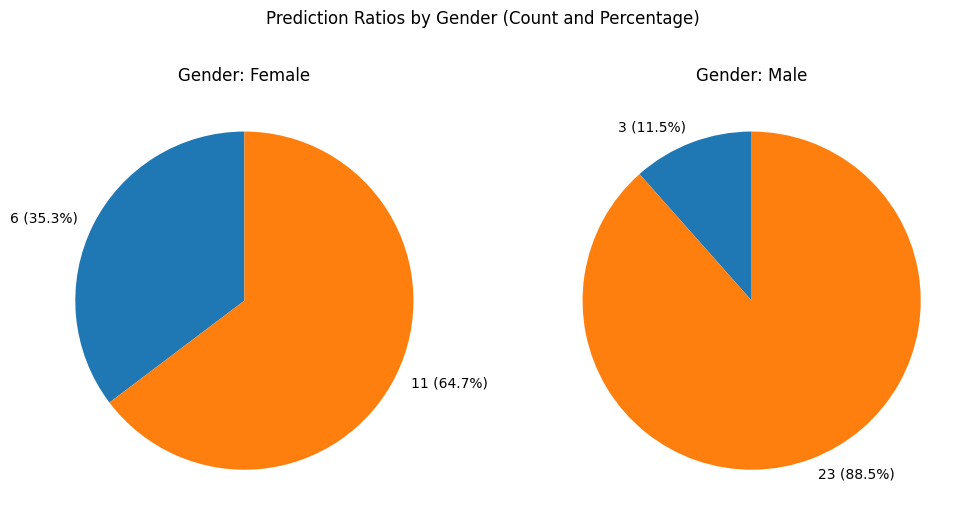

In [ ]:
import matplotlib.pyplot as plt

# Calculate the prediction counts and ratios based on gender
gender_prediction_counts = X_test_prediction_RF['predictions'].groupby(X_test_prediction_RF['gender']).value_counts(normalize=False).unstack()
gender_prediction_ratios = X_test_prediction_RF['predictions'].groupby(X_test_prediction_RF['gender']).value_counts(normalize=True).unstack()

# Plotting pie charts for each gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, gender in enumerate(gender_prediction_counts.index):
    counts = gender_prediction_counts.loc[gender]
    ratios = gender_prediction_ratios.loc[gender]
    labels = [f'{count} ({ratio:.1%})' for count, ratio in zip(counts, ratios)]

    axes[i].pie(counts, labels=labels, autopct=None, startangle=90)
    axes[i].set_title(f'Gender: {"Male" if gender == 1 else "Female"}')

plt.suptitle('Prediction Ratios by Gender (Count and Percentage)')
plt.show()


## Synthetic Data Generation

In [ ]:
!pip -q install langchain
!pip show langchain
!pip install langchain_experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.9/393.9 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
Name: langchain
Version: 0.2.14
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, langchain-core, langchain-text-splitters, langsmith, numpy, pydantic, PyYAML, requests, SQLAl

In [ ]:
!pip -q install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 28.0 MB/s eta 0:00:00


In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "OPENAI_API_KEY"
from langchain_experimental.agents import create_csv_agent
from langchain.llms import OpenAI
from langchain_core.prompts import PromptTemplate

In [ ]:
import warnings
warnings.filterwarnings( "ignore", category = DeprecationWarning)

In [ ]:
from langchain_experimental.agents import create_csv_agent

In [ ]:
llm = OpenAI(temperature=0.56)

In [ ]:
agent_executer = create_csv_agent(llm,
                                  'Dataset Link/Placement_Data_Full_Class.csv',
                                  verbose=True,
                                  allow_dangerous_code=True)

In [ ]:
columns = ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status', 'salary']
new_df = pd.DataFrame(columns=columns)

In [ ]:
new_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary


In [ ]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_values

{'sl_no': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176,

In [ ]:
def create_few_shot_prompt(df, unique_values, num_rows=3):
    prompt = ""

    prompt += "Possible values and data types for variables:\n"
    for col, values in unique_values.items():
        dtype = df[col].dtype
        if dtype == 'object':
            prompt += f"{col} (categorical): {', '.join(map(str, values))}\n"
        else:
            prompt += f"{col} ({dtype}): {values[0]} (example)\n"

    for i in range(num_rows):
        row = df.iloc[i]
        prompt += f"\nQ: Create 1 row of synthetic data.\nA: {row['sl_no']}, {row['gender']}, {row['ssc_p']}, {row['ssc_b']}, {row['hsc_p']}, {row['hsc_b']}, {row['hsc_s']}, {row['degree_p']}, {row['degree_t']}, {row['workex']}, {row['etest_p']}, {row['specialisation']}, {row['mba_p']}, {row['status']}, {row['salary']}"

    return prompt

few_shot_prompt = create_few_shot_prompt(df, unique_values, num_rows=10)
print(few_shot_prompt)

Possible values and data types for variables:
sl_no (int64): 1 (example)
gender (int64): 1 (example)
ssc_p (float64): 67.0 (example)
ssc_b (int64): 1 (example)
hsc_p (float64): 91.0 (example)
hsc_b (int64): 1 (example)
hsc_s (int64): 1 (example)
degree_p (float64): 58.0 (example)
degree_t (int64): 2 (example)
workex (int64): 0 (example)
etest_p (float64): 55.0 (example)
specialisation (int64): 1 (example)
mba_p (float64): 58.8 (example)
status (int64): 1 (example)
salary (float64): 270000.0 (example)

Q: Create 1 row of synthetic data.
A: 1.0, 1.0, 67.0, 1.0, 91.0, 1.0, 1.0, 58.0, 2.0, 0.0, 55.0, 1.0, 58.8, 1.0, 270000.0
Q: Create 1 row of synthetic data.
A: 2.0, 1.0, 79.33, 0.0, 78.33, 1.0, 2.0, 77.48, 2.0, 1.0, 86.5, 0.0, 66.28, 1.0, 200000.0
Q: Create 1 row of synthetic data.
A: 3.0, 1.0, 65.0, 0.0, 68.0, 0.0, 0.0, 64.0, 0.0, 0.0, 75.0, 0.0, 57.8, 1.0, 250000.0
Q: Create 1 row of synthetic data.
A: 4.0, 1.0, 56.0, 0.0, 52.0, 0.0, 2.0, 52.0, 2.0, 0.0, 66.0, 1.0, 59.43, 0.0, 0.0
Q: Cr

In [ ]:
llm = OpenAI(temperature=0.56)

In [ ]:
agent_executer = create_csv_agent(llm,
                                  'Dataset Link/Placement_Data_Full_Class.csv',
                                  verbose=True,
                                  allow_dangerous_code=True)

In [ ]:
few_shot_prompt = few_shot_prompt

In [ ]:
columns = ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status', 'salary']
new_df = pd.DataFrame(columns=columns)
new_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary


In [ ]:
n_length = 20

In [ ]:
# Initialize an empty DataFrame to store the new rows
new_df = pd.DataFrame(columns=columns)

# Loop until new_df has 10 rows
while len(new_df) < n_length:
    try:
        response = agent_executer.invoke(few_shot_prompt + "\nQ: Create 1 row of synthetic data.\nA: ")
        output_data = response['output']

        # Convert the output data into a list (split by commas)
        output_list = [x.strip() for x in output_data.split(',')]

        # Check if the generated data matches the expected number of columns
        if len(output_list) == len(columns):
            output_df = pd.DataFrame([output_list], columns=columns)
            new_df = pd.concat([new_df, output_df], ignore_index=True)
        else:
            print(f"Generated data does not match column length: {output_data}")
    except Exception as e:
        print(f"An error occurred: {e}")




> Entering new AgentExecutor chain...
11.0, 1.0, 67.0, 1.0, 91.0, 1.0, 1.0, 58.0, 2.0, 0.0, 55.0, 1.0, 58.8, 1.0, 270000.0
Thought: I now know the final answer
Final Answer: 11.0, 1.0, 67.0, 1.0, 91.0, 1.0, 1.0, 58.0, 2.0, 0.0, 55.0, 1.0, 58.8, 1.0, 270000.0

> Finished chain.


> Entering new AgentExecutor chain...
11.0, 0.0, 60.0, 0.0, 64.0, 0.0, 2.0, 66.0, 0.0, 0.0, 70.0, 0.0, 60.0, 0.0, 0.0
Thought: I now know the final answer
Final Answer: 11.0, 0.0, 60.0, 0.0, 64.0, 0.0, 2.0, 66.0, 0.0, 0.0, 70.0, 0.0, 60.0, 0.0, 0.0

> Finished chain.


> Entering new AgentExecutor chain...
Thought: I now know the final answer
Final Answer: There are many possible values and data types for each variable in this dataframe. These are just a few examples.

> Finished chain.
Generated data does not match column length: There are many possible values and data types for each variable in this dataframe. These are just a few examples.


> Entering new AgentExecutor chain...
11.0, 0.0, 72.0, 1.0, 63.0,

In [ ]:
new_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,1.0,67.0,1.0,91.0,1.0,1.0,58.0,2.0,0.0,55.0,1.0,58.8,1.0,270000.0
1,11.0,0.0,60.0,0.0,64.0,0.0,2.0,66.0,0.0,0.0,70.0,0.0,60.0,0.0,0.0
2,11.0,0.0,72.0,1.0,63.0,0.0,2.0,56.0,2.0,0.0,68.0,1.0,59.69,1.0,218000.0
3,11.0,1.0,81.0,0.0,75.0,0.0,1.0,70.0,0.0,1.0,72.0,0.0,62.56,1.0,260000.0
4,11.0,1.0,69.0,1.0,85.0,1.0,2.0,69.0,1.0,0.0,75.0,1.0,67.0,1.0,266000.0
5,11.0,0.0,43.0,1.0,62.0,1.0,1.0,65.0,0.0,1.0,76.0,0.0,64.74,0.0,0.0
6,11.0,0.0,62.0,1.0,65.0,1.0,2.0,66.0,2.0,0.0,52.0,1.0,60.0,1.0,260000.0
7,11.0,0.0,67.0,1.0,91.0,1.0,1.0,58.0,2.0,0.0,55.0,1.0,58.8,1.0,270000.0
8,11.0,1.0,67.0,0.0,75.0,0.0,1.0,60.0,0.0,0.0,65.0,0.0,56.0,1.0,280000.0
9,11.0,0.0,66.0,1.0,64.0,1.0,2.0,65.0,2.0,0.0,60.0,1.0,56.0,0.0,0.0


In [ ]:
encoding_info

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [ ]:
df_dtypes = {
    # 'sl_no': 'int64',
    'gender': 'object',
    'ssc_p': 'float64',
    'ssc_b': 'object',
    'hsc_p': 'float64',
    'hsc_b': 'object',
    'hsc_s': 'object',
    'degree_p': 'float64',
    'degree_t': 'object',
    'workex': 'object',
    'etest_p': 'float64',
    'specialisation': 'object',
    'mba_p': 'float64',
    'status': 'object',
    'salary': 'float64'
}
new_df = new_df.astype(df_dtypes)

In [ ]:
synthetic_data = new_df.copy()

In [ ]:
synthetic_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,1.0,67.0,1.0,91.0,1.0,1.0,58.0,2.0,0.0,55.0,1.0,58.80,1.0,270000.0
1,11.0,0.0,60.0,0.0,64.0,0.0,2.0,66.0,0.0,0.0,70.0,0.0,60.00,0.0,0.0
2,11.0,0.0,72.0,1.0,63.0,0.0,2.0,56.0,2.0,0.0,68.0,1.0,59.69,1.0,218000.0
3,11.0,1.0,81.0,0.0,75.0,0.0,1.0,70.0,0.0,1.0,72.0,0.0,62.56,1.0,260000.0
4,11.0,1.0,69.0,1.0,85.0,1.0,2.0,69.0,1.0,0.0,75.0,1.0,67.00,1.0,266000.0
5,11.0,0.0,43.0,1.0,62.0,1.0,1.0,65.0,0.0,1.0,76.0,0.0,64.74,0.0,0.0
6,11.0,0.0,62.0,1.0,65.0,1.0,2.0,66.0,2.0,0.0,52.0,1.0,60.00,1.0,260000.0
7,11.0,0.0,67.0,1.0,91.0,1.0,1.0,58.0,2.0,0.0,55.0,1.0,58.80,1.0,270000.0
8,11.0,1.0,67.0,0.0,75.0,0.0,1.0,60.0,0.0,0.0,65.0,0.0,56.00,1.0,280000.0
9,11.0,0.0,66.0,1.0,64.0,1.0,2.0,65.0,2.0,0.0,60.0,1.0,56.00,0.0,0.0


In [ ]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           20 non-null     object 
 1   gender          20 non-null     object 
 2   ssc_p           20 non-null     float64
 3   ssc_b           20 non-null     object 
 4   hsc_p           20 non-null     float64
 5   hsc_b           20 non-null     object 
 6   hsc_s           20 non-null     object 
 7   degree_p        20 non-null     float64
 8   degree_t        20 non-null     object 
 9   workex          20 non-null     object 
 10  etest_p         20 non-null     float64
 11  specialisation  20 non-null     object 
 12  mba_p           20 non-null     float64
 13  status          20 non-null     object 
 14  salary          20 non-null     float64
dtypes: float64(6), object(9)
memory usage: 2.5+ KB


In [ ]:
# Convert relevant columns to float first to ensure proper conversion
for column in encoding_info.keys():
    synthetic_data[column] = synthetic_data[column].astype(float)

In [ ]:
# Convert relevant columns to integers if they aren't already
for column in encoding_info.keys():
    synthetic_data[column] = synthetic_data[column].astype(int)

In [ ]:
# Reverse the encoding based on encoding_info
for column, mapping in encoding_info.items():
    reverse_mapping = {v: k for k, v in mapping.items()}
    synthetic_data[column] = synthetic_data[column].map(reverse_mapping)

In [ ]:
synthetic_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,11.0,F,60.0,Central,64.0,Central,Science,66.0,Comm&Mgmt,No,70.0,Mkt&Fin,60.00,Not Placed,0.0
2,11.0,F,72.0,Others,63.0,Central,Science,56.0,Sci&Tech,No,68.0,Mkt&HR,59.69,Placed,218000.0
3,11.0,M,81.0,Central,75.0,Central,Commerce,70.0,Comm&Mgmt,Yes,72.0,Mkt&Fin,62.56,Placed,260000.0
4,11.0,M,69.0,Others,85.0,Others,Science,69.0,Others,No,75.0,Mkt&HR,67.00,Placed,266000.0
5,11.0,F,43.0,Others,62.0,Others,Commerce,65.0,Comm&Mgmt,Yes,76.0,Mkt&Fin,64.74,Not Placed,0.0
6,11.0,F,62.0,Others,65.0,Others,Science,66.0,Sci&Tech,No,52.0,Mkt&HR,60.00,Placed,260000.0
7,11.0,F,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
8,11.0,M,67.0,Central,75.0,Central,Commerce,60.0,Comm&Mgmt,No,65.0,Mkt&Fin,56.00,Placed,280000.0
9,11.0,F,66.0,Others,64.0,Others,Science,65.0,Sci&Tech,No,60.0,Mkt&HR,56.00,Not Placed,0.0


## Synthetic Data Validation

In [ ]:
df_original = pd.read_csv('Dataset Link/Placement_Data_Full_Class.csv')
df_original

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
synthetic_data_validation = synthetic_data.copy()
synthetic_data_validation

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,11.0,F,60.0,Central,64.0,Central,Science,66.0,Comm&Mgmt,No,70.0,Mkt&Fin,60.00,Not Placed,0.0
2,11.0,F,72.0,Others,63.0,Central,Science,56.0,Sci&Tech,No,68.0,Mkt&HR,59.69,Placed,218000.0
3,11.0,M,81.0,Central,75.0,Central,Commerce,70.0,Comm&Mgmt,Yes,72.0,Mkt&Fin,62.56,Placed,260000.0
4,11.0,M,69.0,Others,85.0,Others,Science,69.0,Others,No,75.0,Mkt&HR,67.00,Placed,266000.0
5,11.0,F,43.0,Others,62.0,Others,Commerce,65.0,Comm&Mgmt,Yes,76.0,Mkt&Fin,64.74,Not Placed,0.0
6,11.0,F,62.0,Others,65.0,Others,Science,66.0,Sci&Tech,No,52.0,Mkt&HR,60.00,Placed,260000.0
7,11.0,F,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
8,11.0,M,67.0,Central,75.0,Central,Commerce,60.0,Comm&Mgmt,No,65.0,Mkt&Fin,56.00,Placed,280000.0
9,11.0,F,66.0,Others,64.0,Others,Science,65.0,Sci&Tech,No,60.0,Mkt&HR,56.00,Not Placed,0.0


In [ ]:
import numpy as np

# Select only the numerical columns for correlation calculation
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']  # Add other numerical columns if needed

# Calculate the correlation matrices
corr_original = df_original[numerical_columns].corr()
corr_synthetic = synthetic_data_validation[numerical_columns].corr()


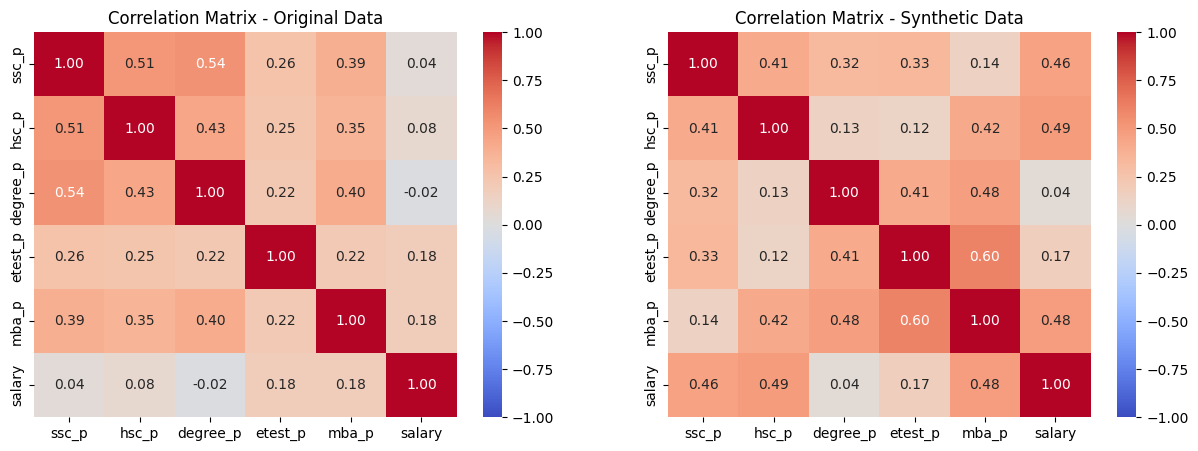

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Original data correlation heatmap
plt.subplot(1, 2, 1)
sns.heatmap(corr_original, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Original Data')

# Synthetic data correlation heatmap
plt.subplot(1, 2, 2)
sns.heatmap(corr_synthetic, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Synthetic Data')

plt.show()


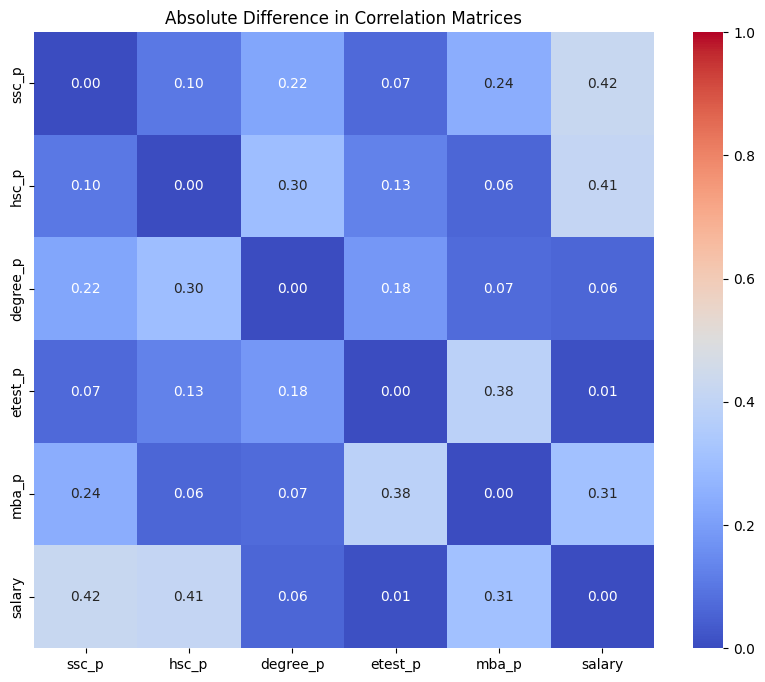

In [ ]:
# Calculate the absolute difference between the correlation matrices
corr_diff = np.abs(corr_original - corr_synthetic)

# Plot the difference heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_diff, annot=True, fmt=".2f", cmap='coolwarm', vmin=0, vmax=1)
plt.title('Absolute Difference in Correlation Matrices')
plt.show()


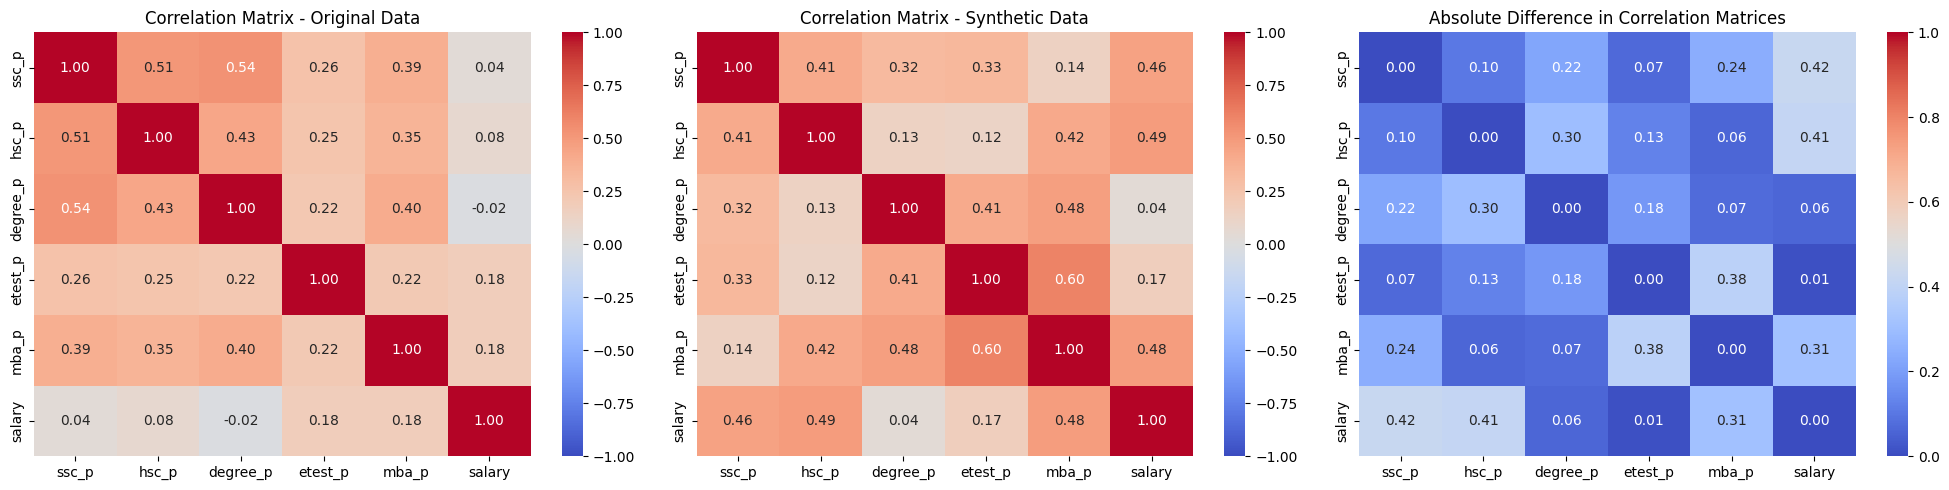

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with 3 subplots side by side
plt.figure(figsize=(20, 5))

# Original data correlation heatmap
plt.subplot(1, 3, 1)
sns.heatmap(corr_original, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Original Data')

# Synthetic data correlation heatmap
plt.subplot(1, 3, 2)
sns.heatmap(corr_synthetic, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix - Synthetic Data')

# Absolute difference heatmap
plt.subplot(1, 3, 3)
sns.heatmap(corr_diff, annot=True, fmt=".2f", cmap='coolwarm', vmin=0, vmax=1)
plt.title('Absolute Difference in Correlation Matrices')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


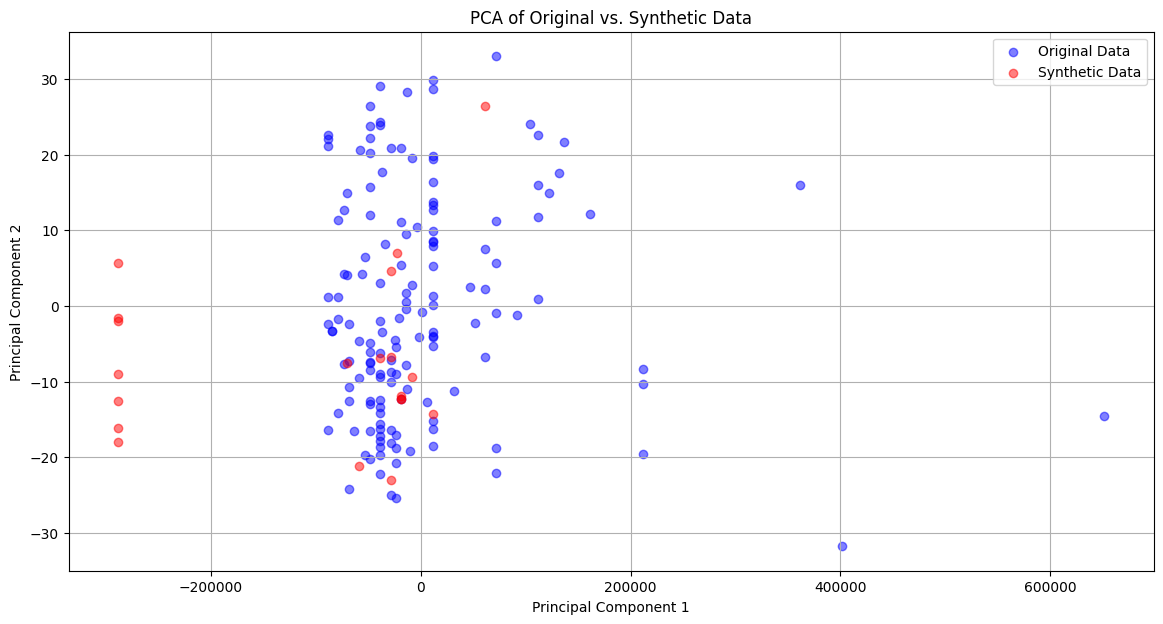

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ensure only numerical columns are used for PCA
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']  # Add or remove columns as necessary

# Apply PCA to the original data
pca = PCA(n_components=2)
pca_original = pca.fit_transform(df_original[numerical_columns].dropna())

# Apply PCA to the synthetic data
pca_synthetic = pca.transform(synthetic_data_validation[numerical_columns].dropna())

# Create a DataFrame for the PCA results
pca_df_original = pd.DataFrame(pca_original, columns=['PC1', 'PC2'])
pca_df_synthetic = pd.DataFrame(pca_synthetic, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(14, 7))

plt.scatter(pca_df_original['PC1'], pca_df_original['PC2'], alpha=0.5, label='Original Data', color='blue')
plt.scatter(pca_df_synthetic['PC1'], pca_df_synthetic['PC2'], alpha=0.5, label='Synthetic Data', color='red')

plt.title('PCA of Original vs. Synthetic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


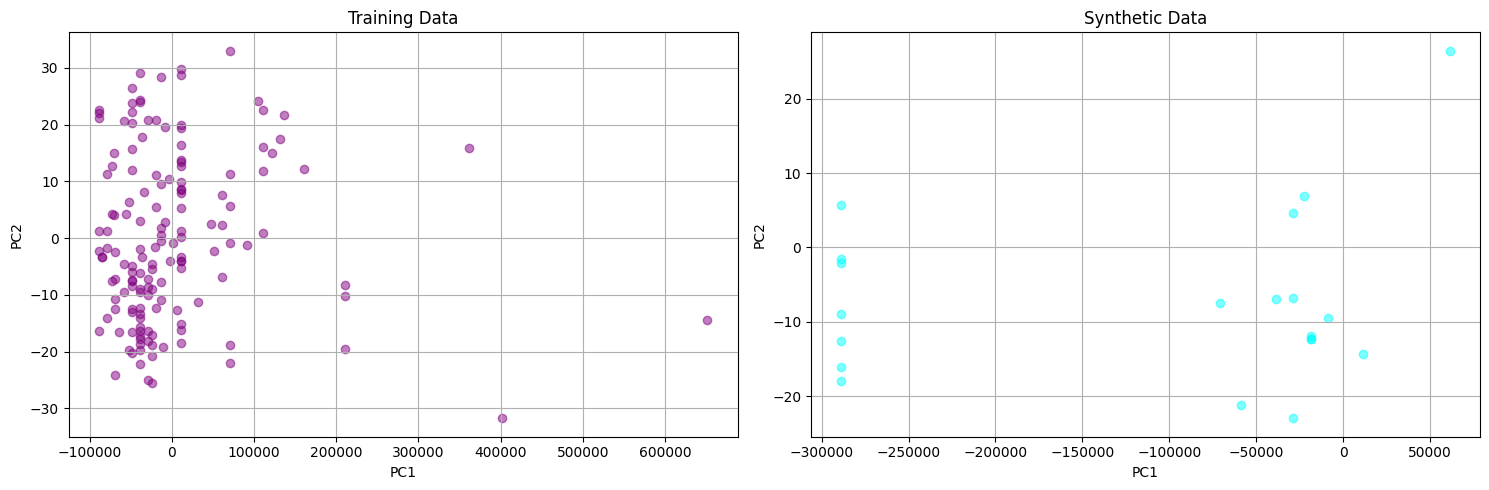

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ensure only numerical columns are used for PCA
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']  # Add or remove columns as necessary

# Apply PCA to the original data
pca = PCA(n_components=2)
pca_original = pca.fit_transform(df_original[numerical_columns].dropna())

# Apply PCA to the synthetic data
pca_synthetic = pca.transform(synthetic_data_validation[numerical_columns].dropna())

# Create DataFrames for the PCA results
pca_df_original = pd.DataFrame(pca_original, columns=['PC1', 'PC2'])
pca_df_synthetic = pd.DataFrame(pca_synthetic, columns=['PC1', 'PC2'])

# Set up the plot with 2 subplots side by side
plt.figure(figsize=(15, 5))

# Plot PCA for original data
plt.subplot(1, 2, 1)
plt.scatter(pca_df_original['PC1'], pca_df_original['PC2'], alpha=0.5, color='purple')
plt.title('Training Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

# Plot PCA for synthetic data
plt.subplot(1, 2, 2)
plt.scatter(pca_df_synthetic['PC1'], pca_df_synthetic['PC2'], alpha=0.5, color='cyan')
plt.title('Synthetic Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

# Adjust layout to avoid overlap and show plots
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


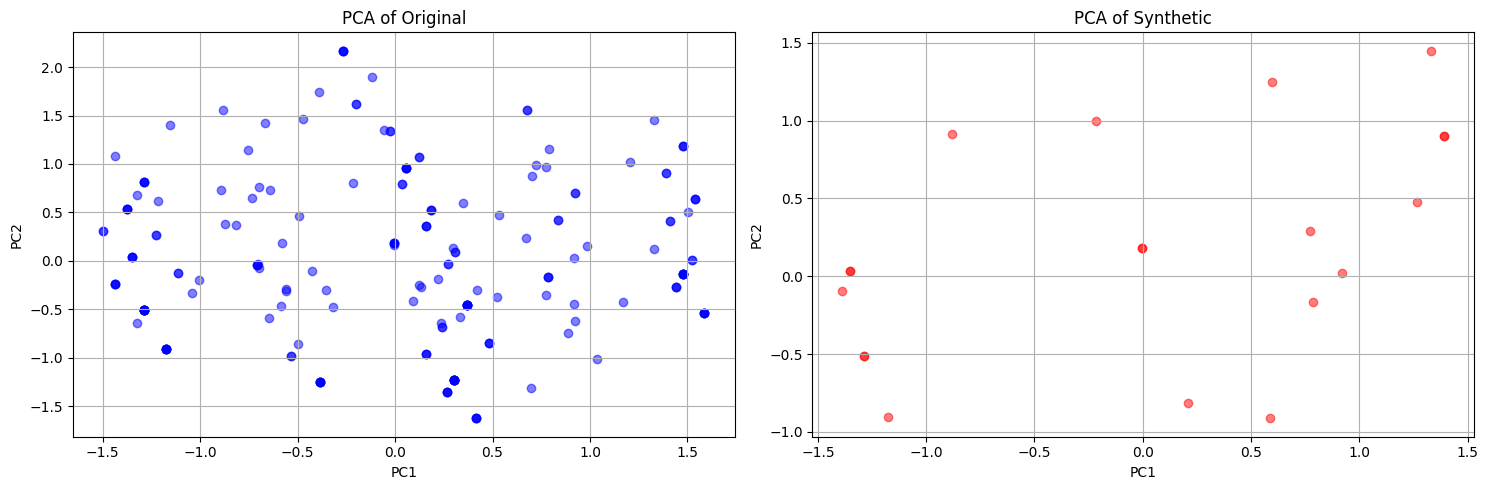

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

# Apply One-Hot Encoding to categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_categorical = encoder.fit_transform(df_original[categorical_columns])

# Create a DataFrame for the encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Do the same for the synthetic data
synthetic_encoded_categorical = encoder.transform(synthetic_data_validation[categorical_columns])
synthetic_encoded_categorical_df = pd.DataFrame(synthetic_encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Apply PCA to the encoded categorical data
pca = PCA(n_components=2)
pca_original = pca.fit_transform(encoded_categorical_df)
pca_synthetic = pca.transform(synthetic_encoded_categorical_df)

# Create DataFrames for the PCA results
pca_df_original = pd.DataFrame(pca_original, columns=['PC1', 'PC2'])
pca_df_synthetic = pd.DataFrame(pca_synthetic, columns=['PC1', 'PC2'])

# Set up the plot with 2 subplots side by side
plt.figure(figsize=(15, 5))

# Plot PCA for original data
plt.subplot(1, 2, 1)
plt.scatter(pca_df_original['PC1'], pca_df_original['PC2'], alpha=0.5, color='blue')
plt.title('PCA of Original')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

# Plot PCA for synthetic data
plt.subplot(1, 2, 2)
plt.scatter(pca_df_synthetic['PC1'], pca_df_synthetic['PC2'], alpha=0.5, color='red')
plt.title('PCA of Synthetic')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

# Adjust layout to avoid overlap and show plots
plt.tight_layout()
plt.show()


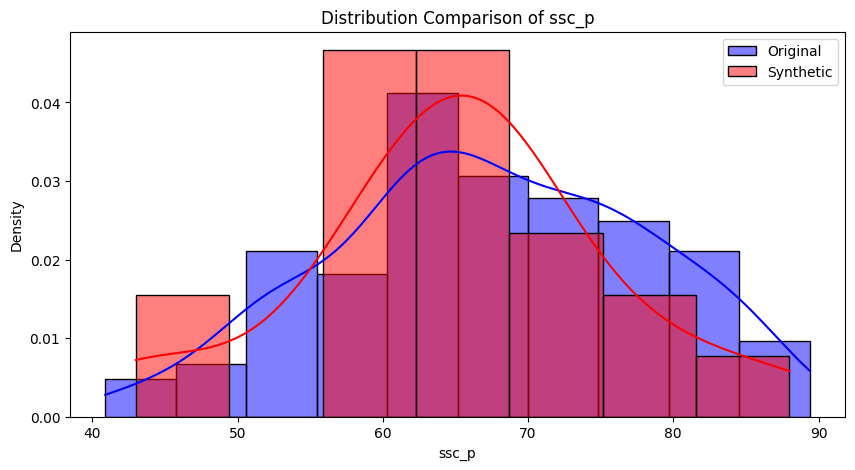

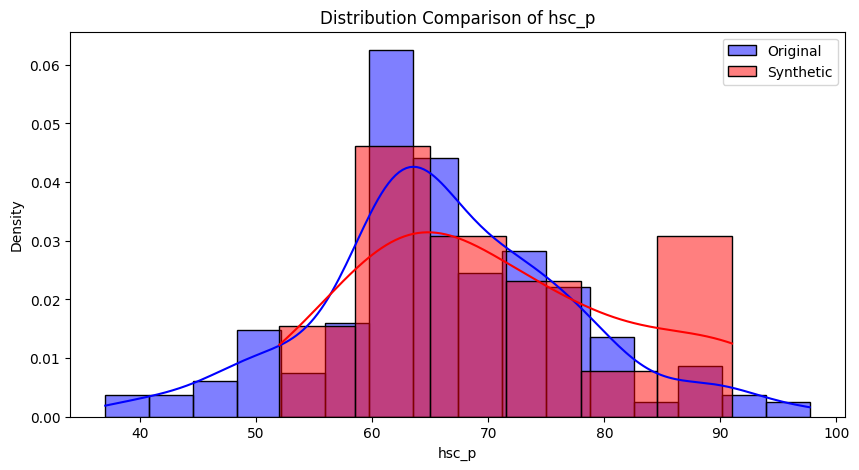

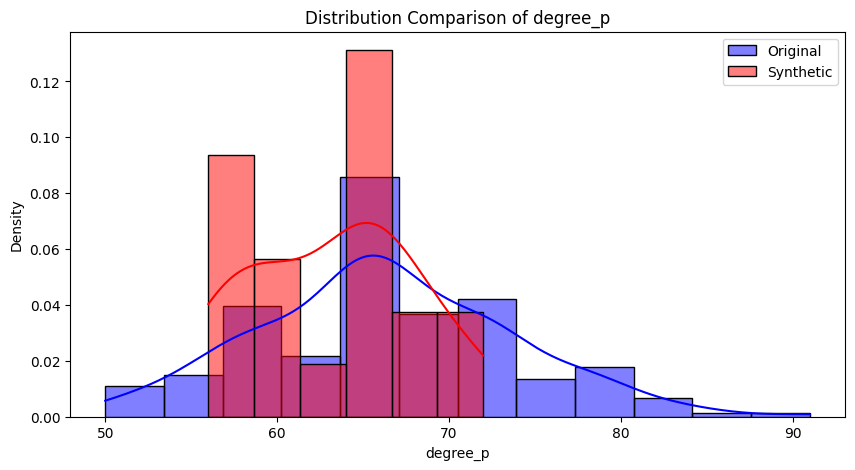

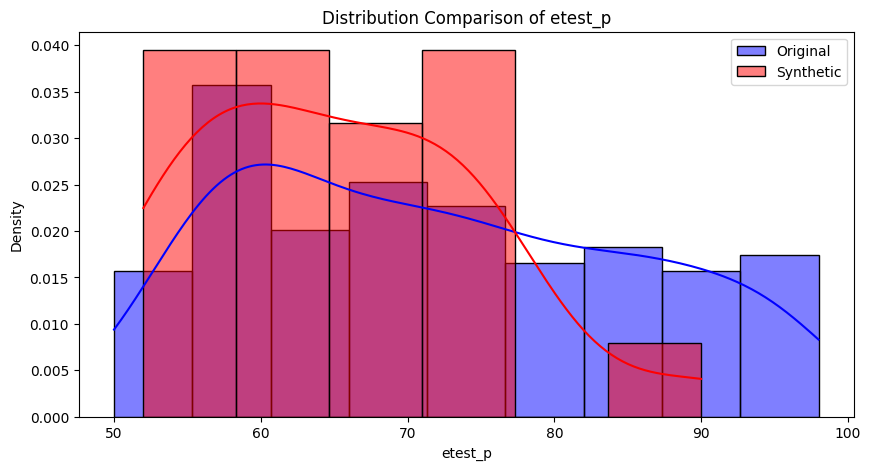

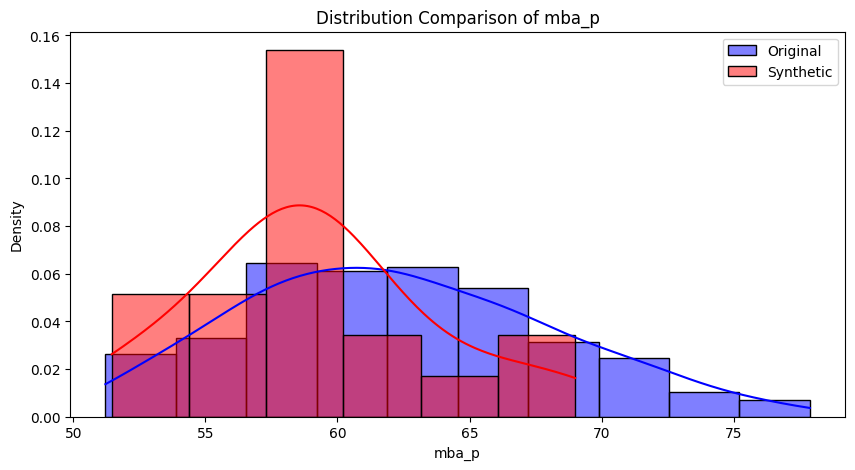

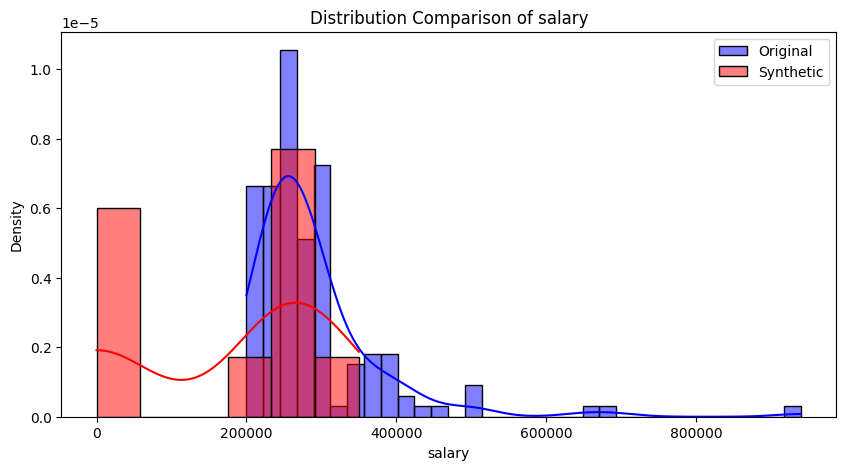

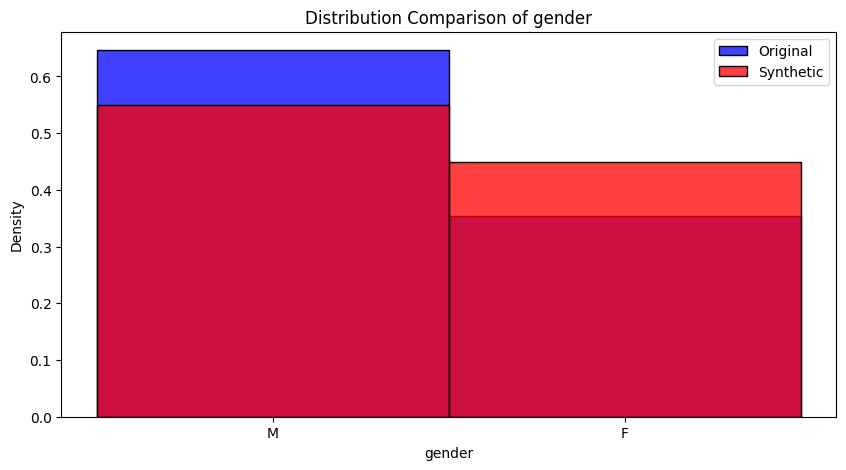

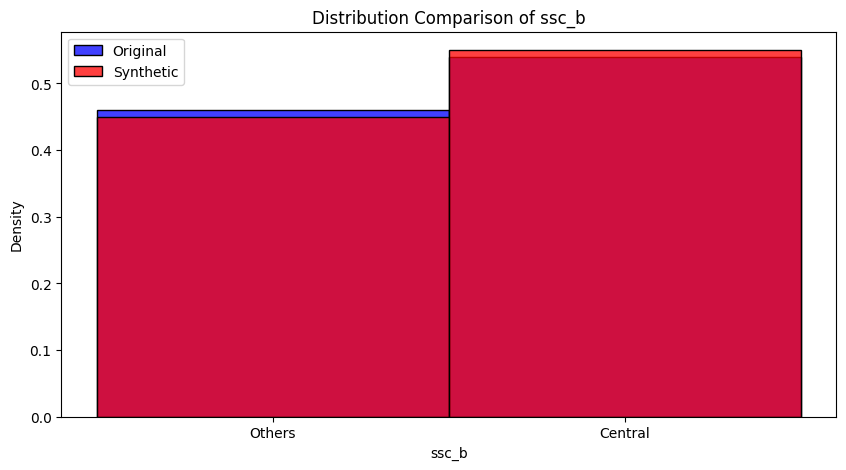

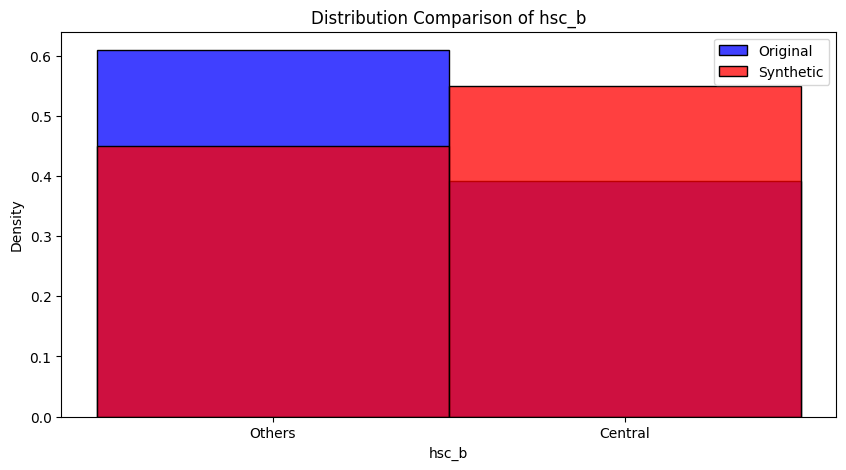

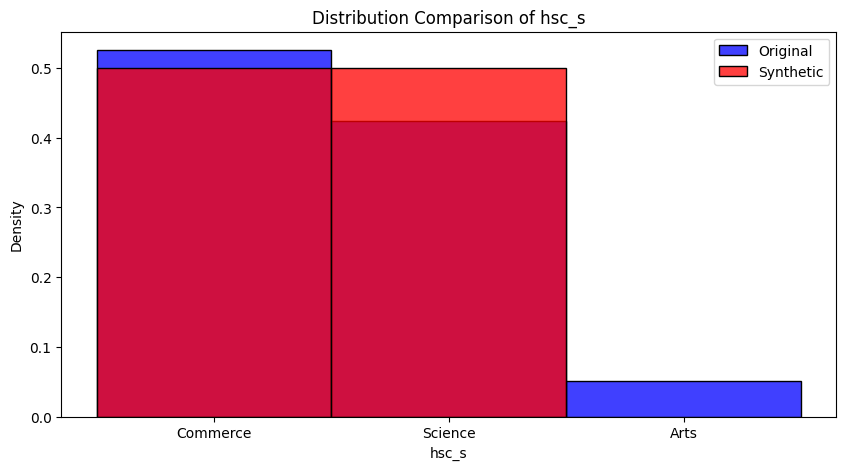

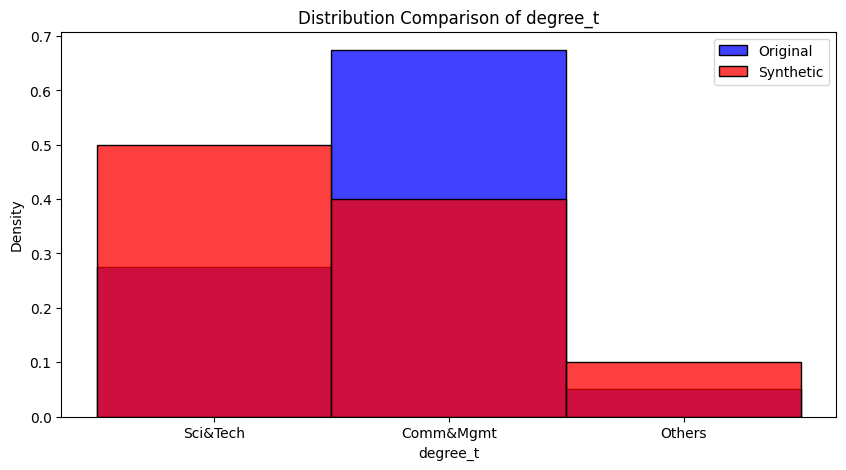

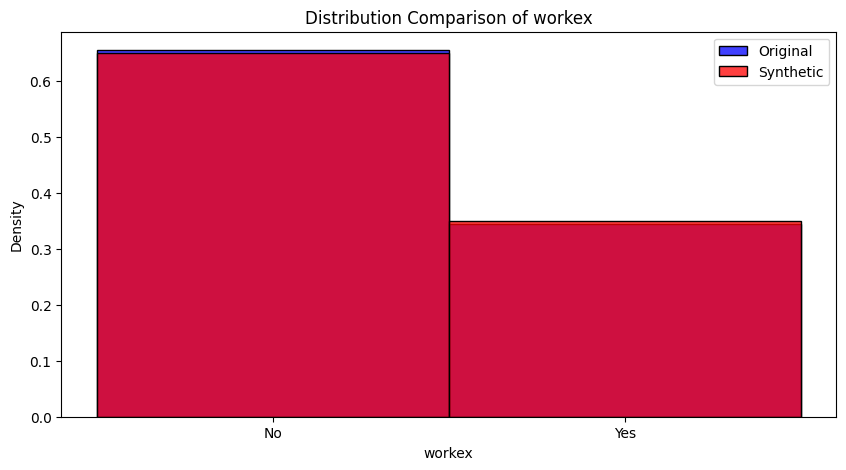

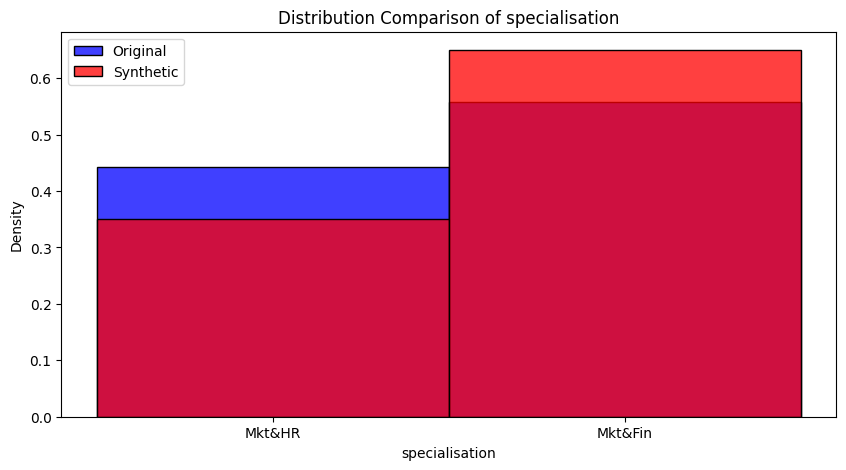

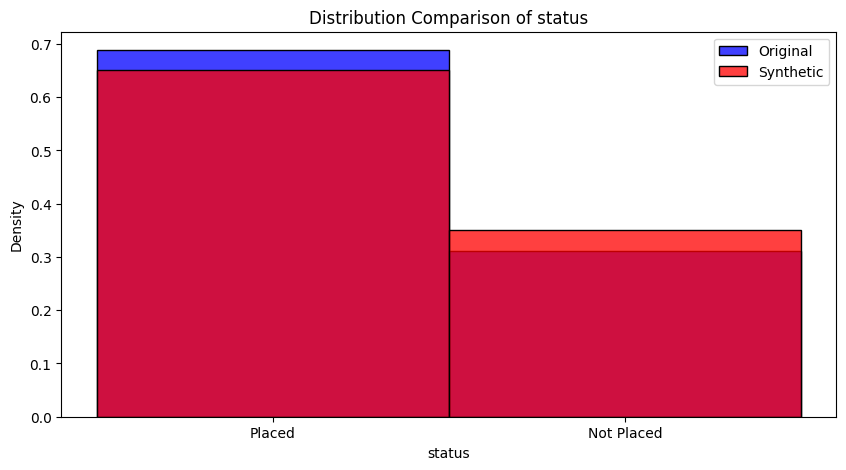

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical and categorical columns
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
categorical_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

# Plotting numerical distributions
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_original[col], color='blue', kde=True, label='Original', stat="density")
    sns.histplot(synthetic_data_validation[col], color='red', kde=True, label='Synthetic', stat="density")
    plt.title(f'Distribution Comparison of {col}')
    plt.legend()
    plt.show()

# Plotting categorical distributions
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_original[col], color='blue', kde=False, label='Original', stat="density")
    sns.histplot(synthetic_data_validation[col], color='red', kde=False, label='Synthetic', stat="density")
    plt.title(f'Distribution Comparison of {col}')
    plt.legend()
    plt.show()


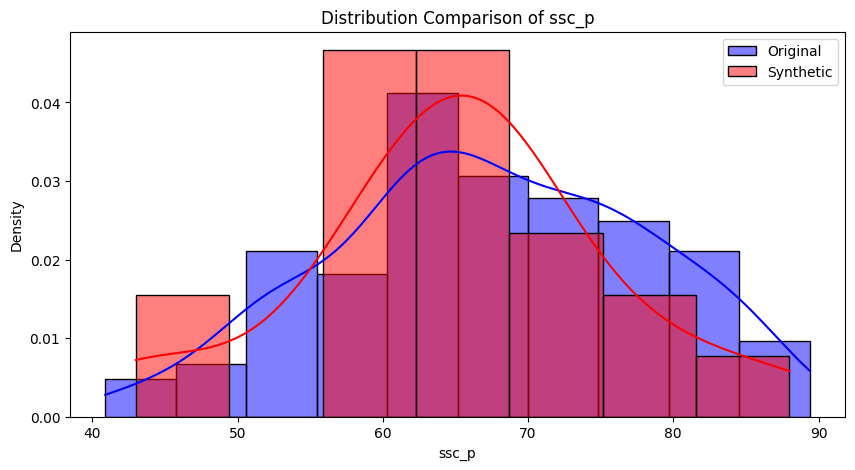

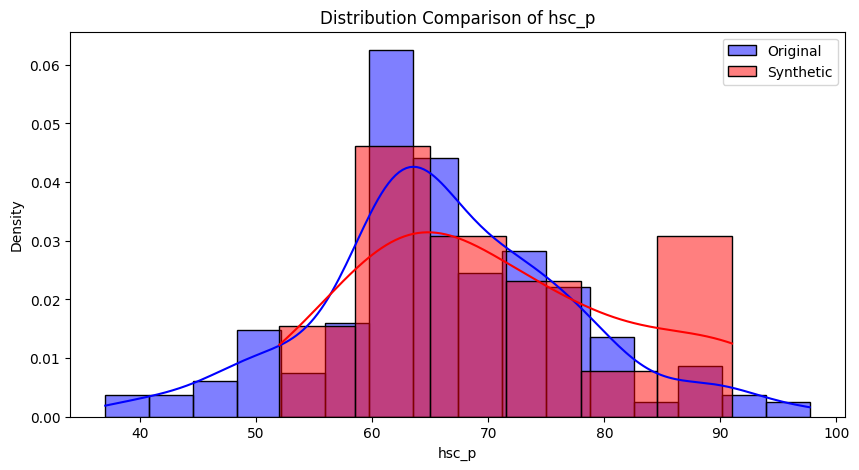

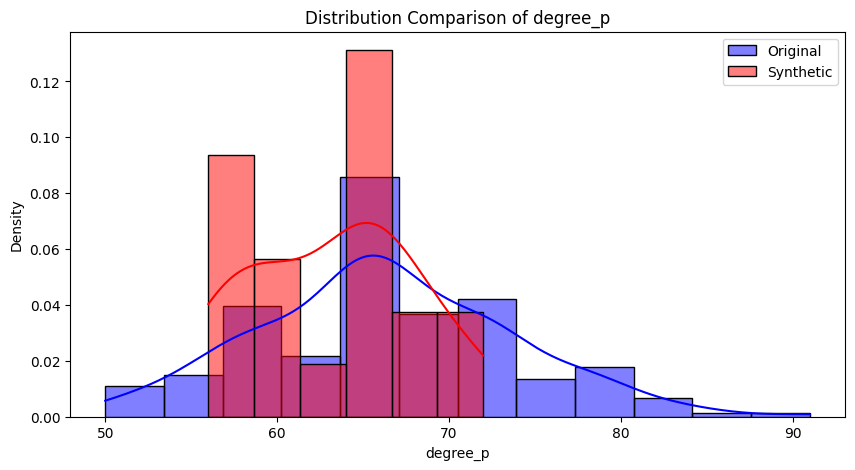

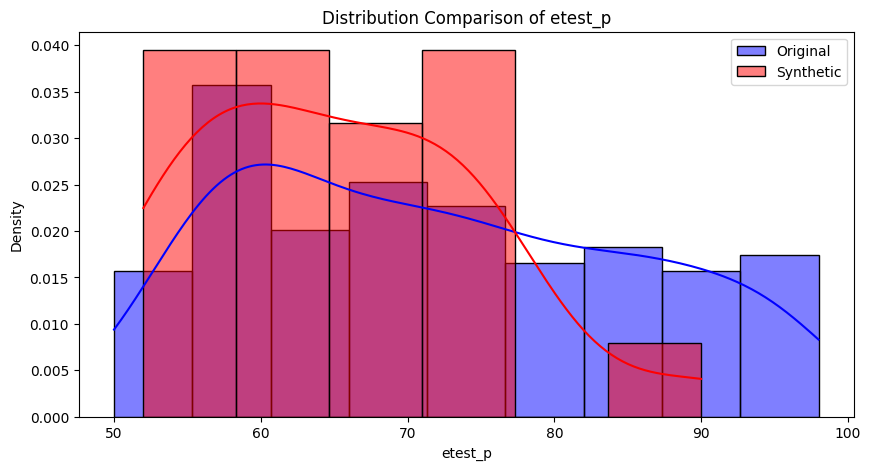

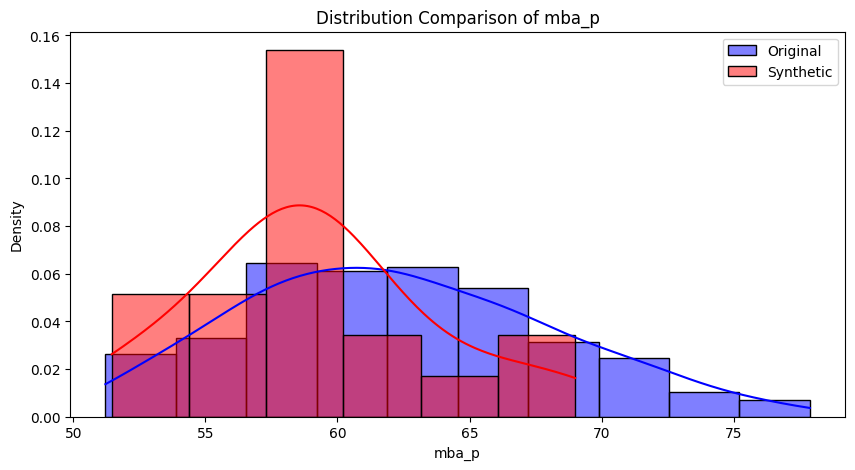

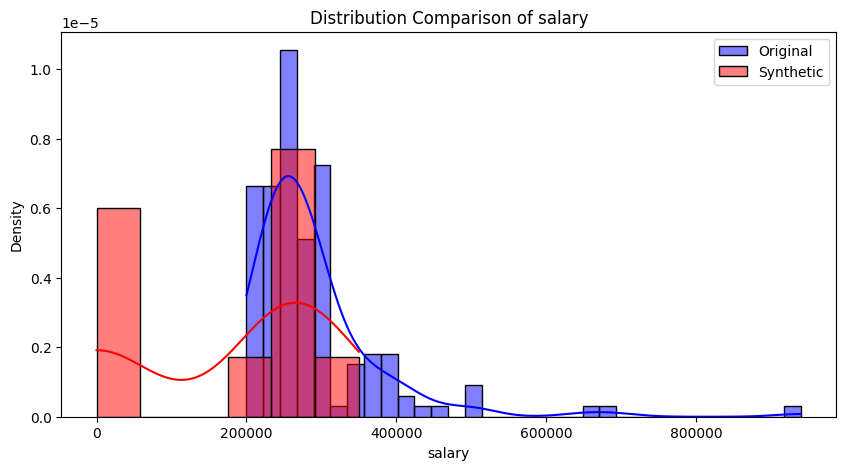

<Figure size 1000x500 with 0 Axes>

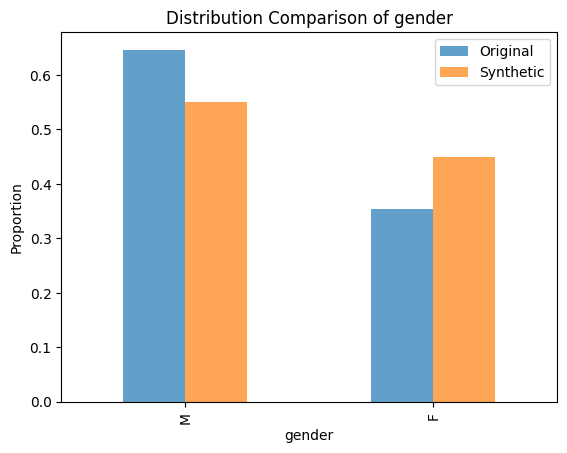

<Figure size 1000x500 with 0 Axes>

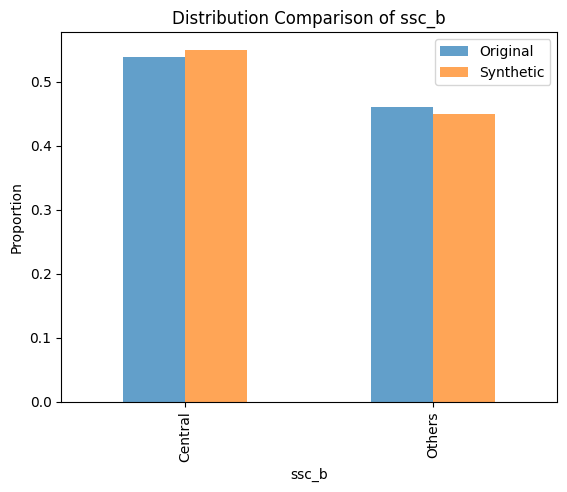

<Figure size 1000x500 with 0 Axes>

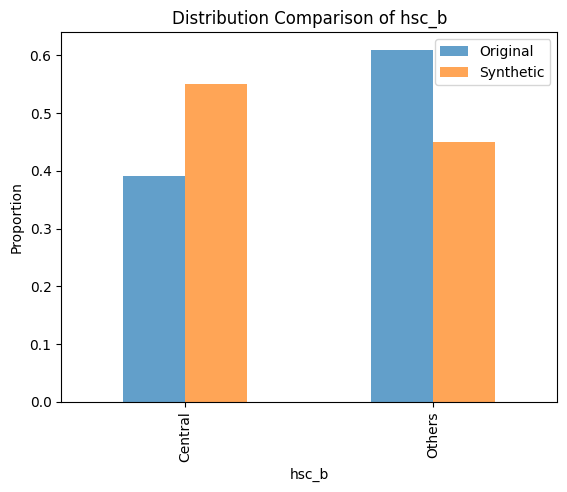

<Figure size 1000x500 with 0 Axes>

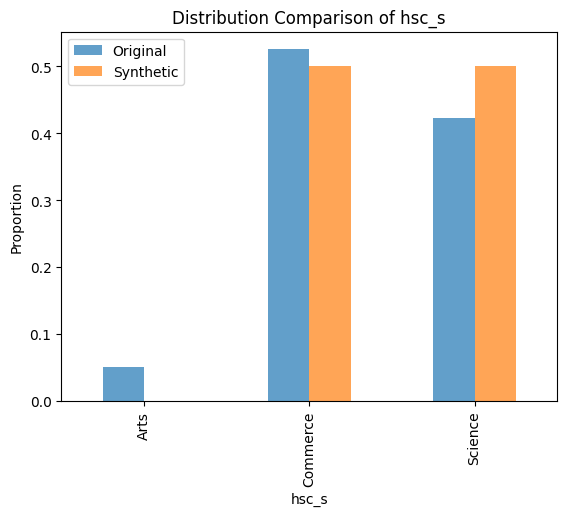

<Figure size 1000x500 with 0 Axes>

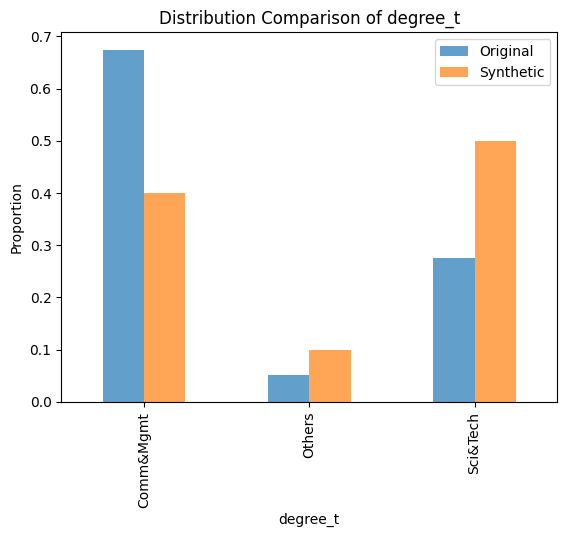

<Figure size 1000x500 with 0 Axes>

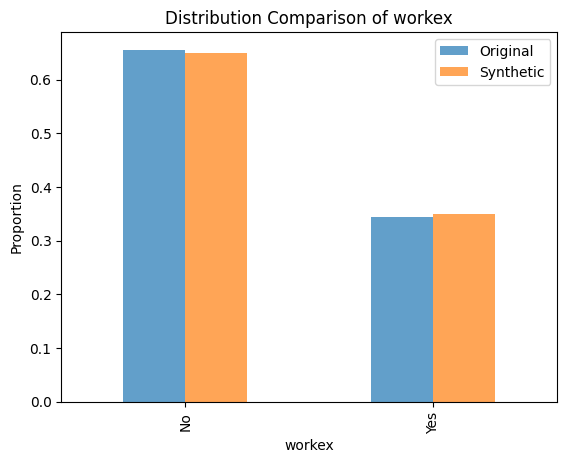

<Figure size 1000x500 with 0 Axes>

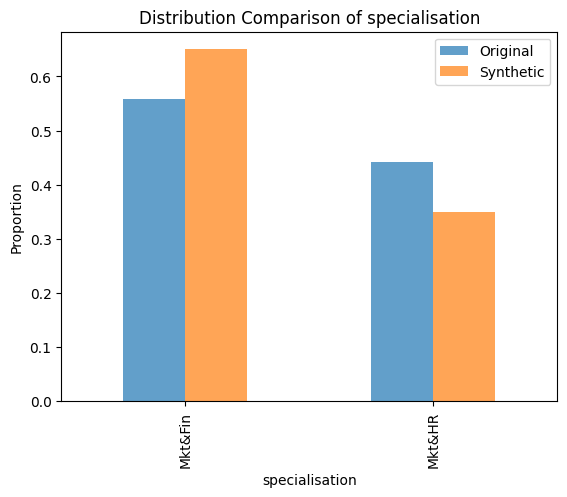

<Figure size 1000x500 with 0 Axes>

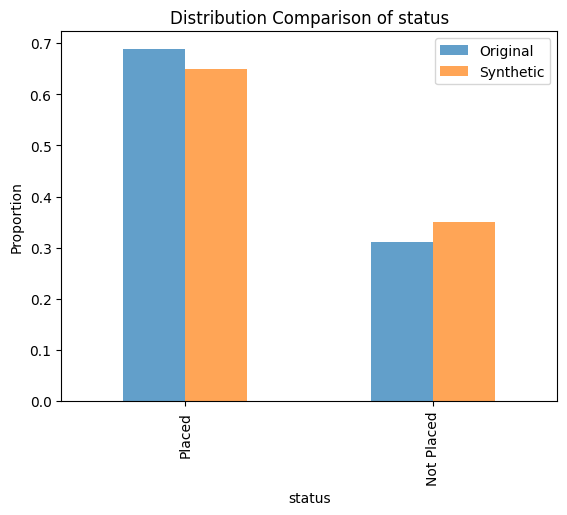

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of numerical and categorical columns
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
categorical_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

# Plotting numerical distributions with transparency
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_original[col], color='blue', kde=True, label='Original', stat="density", alpha=0.5)
    sns.histplot(synthetic_data_validation[col], color='red', kde=True, label='Synthetic', stat="density", alpha=0.5)
    plt.title(f'Distribution Comparison of {col}')
    plt.legend()
    plt.show()

# Plotting categorical distributions with side-by-side bars
for col in categorical_columns:
    plt.figure(figsize=(10, 5))

    # Count occurrences for both original and synthetic data
    original_counts = df_original[col].value_counts(normalize=True)
    synthetic_counts = synthetic_data_validation[col].value_counts(normalize=True)

    # Combine both into a single DataFrame for easier plotting
    comparison_df = pd.DataFrame({
        'Original': original_counts,
        'Synthetic': synthetic_counts
    }).fillna(0)

    # Plot side-by-side bar chart
    comparison_df.plot(kind='bar', alpha=0.7)
    plt.title(f'Distribution Comparison of {col}')
    plt.ylabel('Proportion')
    plt.show()


## Retraining ML

In [ ]:
import pandas as pd
df_original = pd.read_csv('Dataset Link/Placement_Data_Full_Class.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_original[col] = le.fit_transform(df_original[col])
    label_encoders[col] = le

df_original['salary'].fillna(0, inplace=True)

In [ ]:
df_original

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
X = df_original.drop(['sl_no', 'status', 'salary'], axis=1)
y_status = df_original['status']
X_train, X_test, y_train_status, y_test_status = train_test_split(X, y_status, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

models_status = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    # 'Random Forest': RandomForestClassifier(random_state=42),
    # 'SVM': SVC(kernel='linear')
}

In [ ]:
from sklearn.metrics import classification_report
for name, model in models_status.items():
    model.fit(X_train, y_train_status)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test_status, predictions)
    print(f'{name} Accuracy: {accuracy:.2f}')

    report = classification_report(y_test_status, predictions)
    print(report)
    print()

Logistic Regression Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43




In [ ]:
encoding_info = {}
for col, le in label_encoders.items():
    encoding_info[col] = dict(zip(le.classes_, le.transform(le.classes_)))

encoding_info

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [ ]:
## Retraining with synthetic data

In [ ]:
synthetic_data_retrain = synthetic_data_validation.head(7)
synthetic_data_retrain

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,11.0,F,60.0,Central,64.0,Central,Science,66.0,Comm&Mgmt,No,70.0,Mkt&Fin,60.00,Not Placed,0.0
2,11.0,F,72.0,Others,63.0,Central,Science,56.0,Sci&Tech,No,68.0,Mkt&HR,59.69,Placed,218000.0
3,11.0,M,81.0,Central,75.0,Central,Commerce,70.0,Comm&Mgmt,Yes,72.0,Mkt&Fin,62.56,Placed,260000.0
4,11.0,M,69.0,Others,85.0,Others,Science,69.0,Others,No,75.0,Mkt&HR,67.00,Placed,266000.0
5,11.0,F,43.0,Others,62.0,Others,Commerce,65.0,Comm&Mgmt,Yes,76.0,Mkt&Fin,64.74,Not Placed,0.0
6,11.0,F,62.0,Others,65.0,Others,Science,66.0,Sci&Tech,No,52.0,Mkt&HR,60.00,Placed,260000.0


In [ ]:
# synthetic_data_retrain = synthetic_data_validation.copy()
# synthetic_data_retrain

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

for column, mapping in encoding_info.items():
    synthetic_data_retrain[column] = synthetic_data_retrain[column].map(mapping)

synthetic_data_retrain['salary'].fillna(0, inplace=True)

<ipython-input-734-caa43836f0c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synthetic_data_retrain[column] = synthetic_data_retrain[column].map(mapping)
<ipython-input-734-caa43836f0c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synthetic_data_retrain[column] = synthetic_data_retrain[column].map(mapping)
<ipython-input-734-caa43836f0c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
synthetic_data_retrain

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80,1,270000.0
1,11.0,0,60.0,0,64.0,0,2,66.0,0,0,70.0,0,60.00,0,0.0
2,11.0,0,72.0,1,63.0,0,2,56.0,2,0,68.0,1,59.69,1,218000.0
3,11.0,1,81.0,0,75.0,0,1,70.0,0,1,72.0,0,62.56,1,260000.0
4,11.0,1,69.0,1,85.0,1,2,69.0,1,0,75.0,1,67.00,1,266000.0
5,11.0,0,43.0,1,62.0,1,1,65.0,0,1,76.0,0,64.74,0,0.0
6,11.0,0,62.0,1,65.0,1,2,66.0,2,0,52.0,1,60.00,1,260000.0


In [ ]:
synthetic_data_retrain['salary'].fillna(0, inplace=True)

<ipython-input-736-0486fba10e7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synthetic_data_retrain['salary'].fillna(0, inplace=True)


In [ ]:
synthetic_data_retrain

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80,1,270000.0
1,11.0,0,60.0,0,64.0,0,2,66.0,0,0,70.0,0,60.00,0,0.0
2,11.0,0,72.0,1,63.0,0,2,56.0,2,0,68.0,1,59.69,1,218000.0
3,11.0,1,81.0,0,75.0,0,1,70.0,0,1,72.0,0,62.56,1,260000.0
4,11.0,1,69.0,1,85.0,1,2,69.0,1,0,75.0,1,67.00,1,266000.0
5,11.0,0,43.0,1,62.0,1,1,65.0,0,1,76.0,0,64.74,0,0.0
6,11.0,0,62.0,1,65.0,1,2,66.0,2,0,52.0,1,60.00,1,260000.0


In [ ]:
synthetic_data_retrain

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80,1,270000.0
1,11.0,0,60.0,0,64.0,0,2,66.0,0,0,70.0,0,60.00,0,0.0
2,11.0,0,72.0,1,63.0,0,2,56.0,2,0,68.0,1,59.69,1,218000.0
3,11.0,1,81.0,0,75.0,0,1,70.0,0,1,72.0,0,62.56,1,260000.0
4,11.0,1,69.0,1,85.0,1,2,69.0,1,0,75.0,1,67.00,1,266000.0
5,11.0,0,43.0,1,62.0,1,1,65.0,0,1,76.0,0,64.74,0,0.0
6,11.0,0,62.0,1,65.0,1,2,66.0,2,0,52.0,1,60.00,1,260000.0


In [ ]:
X_synthetic_data_retrain = synthetic_data_retrain.drop(['sl_no', 'status', 'salary'], axis=1)
y_status_X_synthetic_data_retrain = synthetic_data_retrain['status']

In [ ]:
X_synthetic_data_retrain

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80
1,0,60.0,0,64.0,0,2,66.0,0,0,70.0,0,60.00
2,0,72.0,1,63.0,0,2,56.0,2,0,68.0,1,59.69
3,1,81.0,0,75.0,0,1,70.0,0,1,72.0,0,62.56
4,1,69.0,1,85.0,1,2,69.0,1,0,75.0,1,67.00
5,0,43.0,1,62.0,1,1,65.0,0,1,76.0,0,64.74
6,0,62.0,1,65.0,1,2,66.0,2,0,52.0,1,60.00


In [ ]:
y_status_X_synthetic_data_retrain

,status
0,1
1,0
2,1
3,1
4,1
5,0
6,1


In [ ]:
from sklearn.metrics import classification_report
for name, model in models_status.items():
    model.fit(X_synthetic_data_retrain, y_status_X_synthetic_data_retrain)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test_status, predictions)
    print(f'{name} Accuracy: {accuracy:.2f}')

    report = classification_report(y_test_status, predictions)
    print(report)
    print()

Logistic Regression Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.47      0.67      0.55        12
           1       0.85      0.71      0.77        31

    accuracy                           0.70        43
   macro avg       0.66      0.69      0.66        43
weighted avg       0.74      0.70      0.71        43




In [ ]:
X_test.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
200,1,69.0,1,60.0,1,1,65.0,0,0,87.55,0,52.81
212,1,67.0,1,67.0,1,1,73.0,0,1,59.00,0,69.72
138,0,82.0,1,64.0,1,2,73.0,2,1,96.00,0,71.77
176,0,59.0,0,60.0,1,1,56.0,0,0,55.00,1,57.90
15,0,65.0,0,75.0,0,1,69.0,0,1,72.00,0,64.66


In [ ]:
predictions

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
len(X_test)

43

In [ ]:
len(predictions)

43

In [ ]:
X_test_prediction_LR = X_test.copy()

In [ ]:
X_test_prediction_LR['predictions'] = predictions

In [ ]:
X_test_prediction_LR.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,predictions
200,1,69.0,1,60.0,1,1,65.0,0,0,87.55,0,52.81,0
212,1,67.0,1,67.0,1,1,73.0,0,1,59.00,0,69.72,1
138,0,82.0,1,64.0,1,2,73.0,2,1,96.00,0,71.77,0
176,0,59.0,0,60.0,1,1,56.0,0,0,55.00,1,57.90,1
15,0,65.0,0,75.0,0,1,69.0,0,1,72.00,0,64.66,1


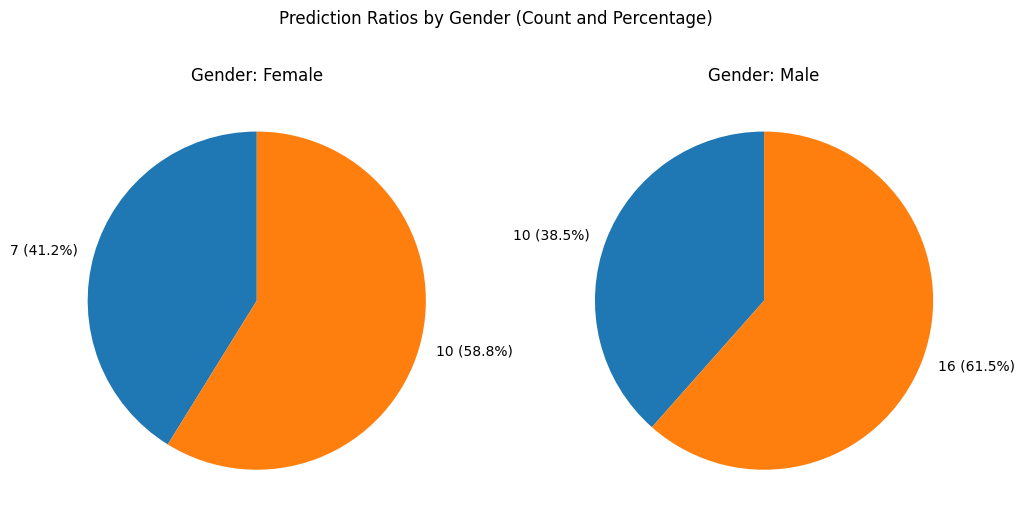

In [ ]:
import matplotlib.pyplot as plt

# Calculate the prediction counts and ratios based on gender
gender_prediction_counts = X_test_prediction_LR['predictions'].groupby(X_test_prediction_LR['gender']).value_counts(normalize=False).unstack(fill_value=0)
gender_prediction_ratios = X_test_prediction_LR['predictions'].groupby(X_test_prediction_LR['gender']).value_counts(normalize=True).unstack(fill_value=0)

# Plotting pie charts for each gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, gender in enumerate(gender_prediction_counts.index):
    counts = gender_prediction_counts.loc[gender]
    ratios = gender_prediction_ratios.loc[gender]
    labels = [f'{count} ({ratio:.1%})' for count, ratio in zip(counts, ratios)]

    axes[i].pie(counts, labels=labels, autopct=None, startangle=90)
    axes[i].set_title(f'Gender: {"Male" if gender == 1 else "Female"}')

plt.suptitle('Prediction Ratios by Gender (Count and Percentage)')
plt.show()


In [ ]:
import pandas as pd
df_original = pd.read_csv('Dataset Link/Placement_Data_Full_Class.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_original[col] = le.fit_transform(df_original[col])
    label_encoders[col] = le

df_original['salary'].fillna(0, inplace=True)

In [ ]:
df_original

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
X = df_original.drop(['sl_no', 'status', 'salary'], axis=1)
y_status = df_original['status']
X_train, X_test, y_train_status, y_test_status = train_test_split(X, y_status, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

models_status = {
    # 'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    # 'SVM': SVC(kernel='linear')
}

In [ ]:
from sklearn.metrics import classification_report
for name, model in models_status.items():
    model.fit(X_train, y_train_status)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test_status, predictions)
    print(f'{name} Accuracy: {accuracy:.2f}')

    report = classification_report(y_test_status, predictions)
    print(report)
    print()

Random Forest Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.82      0.90      0.86        31

    accuracy                           0.79        43
   macro avg       0.75      0.70      0.72        43
weighted avg       0.78      0.79      0.78        43




In [ ]:
encoding_info = {}
for col, le in label_encoders.items():
    encoding_info[col] = dict(zip(le.classes_, le.transform(le.classes_)))

encoding_info

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [ ]:
## Retraining with synthetic data

In [ ]:
synthetic_data_retrain = synthetic_data_validation.head(10)
synthetic_data_retrain

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,11.0,F,60.0,Central,64.0,Central,Science,66.0,Comm&Mgmt,No,70.0,Mkt&Fin,60.00,Not Placed,0.0
2,11.0,F,72.0,Others,63.0,Central,Science,56.0,Sci&Tech,No,68.0,Mkt&HR,59.69,Placed,218000.0
3,11.0,M,81.0,Central,75.0,Central,Commerce,70.0,Comm&Mgmt,Yes,72.0,Mkt&Fin,62.56,Placed,260000.0
4,11.0,M,69.0,Others,85.0,Others,Science,69.0,Others,No,75.0,Mkt&HR,67.00,Placed,266000.0
5,11.0,F,43.0,Others,62.0,Others,Commerce,65.0,Comm&Mgmt,Yes,76.0,Mkt&Fin,64.74,Not Placed,0.0
6,11.0,F,62.0,Others,65.0,Others,Science,66.0,Sci&Tech,No,52.0,Mkt&HR,60.00,Placed,260000.0
7,11.0,F,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
8,11.0,M,67.0,Central,75.0,Central,Commerce,60.0,Comm&Mgmt,No,65.0,Mkt&Fin,56.00,Placed,280000.0
9,11.0,F,66.0,Others,64.0,Others,Science,65.0,Sci&Tech,No,60.0,Mkt&HR,56.00,Not Placed,0.0


In [ ]:
# synthetic_data_retrain = synthetic_data_validation.copy()
# synthetic_data_retrain

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

for column, mapping in encoding_info.items():
    synthetic_data_retrain[column] = synthetic_data_retrain[column].map(mapping)

synthetic_data_retrain['salary'].fillna(0, inplace=True)

<ipython-input-706-caa43836f0c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synthetic_data_retrain[column] = synthetic_data_retrain[column].map(mapping)
<ipython-input-706-caa43836f0c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synthetic_data_retrain[column] = synthetic_data_retrain[column].map(mapping)
<ipython-input-706-caa43836f0c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
synthetic_data_retrain

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80,1,270000.0
1,11.0,0,60.0,0,64.0,0,2,66.0,0,0,70.0,0,60.00,0,0.0
2,11.0,0,72.0,1,63.0,0,2,56.0,2,0,68.0,1,59.69,1,218000.0
3,11.0,1,81.0,0,75.0,0,1,70.0,0,1,72.0,0,62.56,1,260000.0
4,11.0,1,69.0,1,85.0,1,2,69.0,1,0,75.0,1,67.00,1,266000.0
5,11.0,0,43.0,1,62.0,1,1,65.0,0,1,76.0,0,64.74,0,0.0
6,11.0,0,62.0,1,65.0,1,2,66.0,2,0,52.0,1,60.00,1,260000.0
7,11.0,0,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80,1,270000.0
8,11.0,1,67.0,0,75.0,0,1,60.0,0,0,65.0,0,56.00,1,280000.0
9,11.0,0,66.0,1,64.0,1,2,65.0,2,0,60.0,1,56.00,0,0.0


In [ ]:
synthetic_data_retrain['salary'].fillna(0, inplace=True)

<ipython-input-708-0486fba10e7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synthetic_data_retrain['salary'].fillna(0, inplace=True)


In [ ]:
synthetic_data_retrain

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80,1,270000.0
1,11.0,0,60.0,0,64.0,0,2,66.0,0,0,70.0,0,60.00,0,0.0
2,11.0,0,72.0,1,63.0,0,2,56.0,2,0,68.0,1,59.69,1,218000.0
3,11.0,1,81.0,0,75.0,0,1,70.0,0,1,72.0,0,62.56,1,260000.0
4,11.0,1,69.0,1,85.0,1,2,69.0,1,0,75.0,1,67.00,1,266000.0
5,11.0,0,43.0,1,62.0,1,1,65.0,0,1,76.0,0,64.74,0,0.0
6,11.0,0,62.0,1,65.0,1,2,66.0,2,0,52.0,1,60.00,1,260000.0
7,11.0,0,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80,1,270000.0
8,11.0,1,67.0,0,75.0,0,1,60.0,0,0,65.0,0,56.00,1,280000.0
9,11.0,0,66.0,1,64.0,1,2,65.0,2,0,60.0,1,56.00,0,0.0


In [ ]:
# Change 'status' to 1 where 'gender' is 0
# synthetic_data_retrain.loc[synthetic_data_retrain['gender'] == 0, 'status'] = 1
# synthetic_data_retrain.loc[synthetic_data_retrain['gender'] == 1, 'status'] = 0

In [ ]:
synthetic_data_retrain

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80,1,270000.0
1,11.0,0,60.0,0,64.0,0,2,66.0,0,0,70.0,0,60.00,0,0.0
2,11.0,0,72.0,1,63.0,0,2,56.0,2,0,68.0,1,59.69,1,218000.0
3,11.0,1,81.0,0,75.0,0,1,70.0,0,1,72.0,0,62.56,1,260000.0
4,11.0,1,69.0,1,85.0,1,2,69.0,1,0,75.0,1,67.00,1,266000.0
5,11.0,0,43.0,1,62.0,1,1,65.0,0,1,76.0,0,64.74,0,0.0
6,11.0,0,62.0,1,65.0,1,2,66.0,2,0,52.0,1,60.00,1,260000.0
7,11.0,0,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80,1,270000.0
8,11.0,1,67.0,0,75.0,0,1,60.0,0,0,65.0,0,56.00,1,280000.0
9,11.0,0,66.0,1,64.0,1,2,65.0,2,0,60.0,1,56.00,0,0.0


In [ ]:
X_synthetic_data_retrain = synthetic_data_retrain.drop(['sl_no', 'status', 'salary'], axis=1)
y_status_X_synthetic_data_retrain = synthetic_data_retrain['status']

In [ ]:
X_synthetic_data_retrain

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80
1,0,60.0,0,64.0,0,2,66.0,0,0,70.0,0,60.00
2,0,72.0,1,63.0,0,2,56.0,2,0,68.0,1,59.69
3,1,81.0,0,75.0,0,1,70.0,0,1,72.0,0,62.56
4,1,69.0,1,85.0,1,2,69.0,1,0,75.0,1,67.00
5,0,43.0,1,62.0,1,1,65.0,0,1,76.0,0,64.74
6,0,62.0,1,65.0,1,2,66.0,2,0,52.0,1,60.00
7,0,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80
8,1,67.0,0,75.0,0,1,60.0,0,0,65.0,0,56.00
9,0,66.0,1,64.0,1,2,65.0,2,0,60.0,1,56.00


In [ ]:
y_status_X_synthetic_data_retrain

,status
0,1
1,0
2,1
3,1
4,1
5,0
6,1
7,1
8,1
9,0


In [ ]:
from sklearn.metrics import classification_report
for name, model in models_status.items():
    model.fit(X_synthetic_data_retrain, y_status_X_synthetic_data_retrain)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test_status, predictions)
    print(f'{name} Accuracy: {accuracy:.2f}')

    report = classification_report(y_test_status, predictions)
    print(report)
    print()

Random Forest Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.81      0.94      0.87        31

    accuracy                           0.79        43
   macro avg       0.76      0.68      0.70        43
weighted avg       0.78      0.79      0.77        43




In [ ]:
X_test.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
200,1,69.0,1,60.0,1,1,65.0,0,0,87.55,0,52.81
212,1,67.0,1,67.0,1,1,73.0,0,1,59.00,0,69.72
138,0,82.0,1,64.0,1,2,73.0,2,1,96.00,0,71.77
176,0,59.0,0,60.0,1,1,56.0,0,0,55.00,1,57.90
15,0,65.0,0,75.0,0,1,69.0,0,1,72.00,0,64.66


In [ ]:
predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
len(X_test)

43

In [ ]:
len(predictions)

43

In [ ]:
X_test_prediction_LR = X_test.copy()

In [ ]:
X_test_prediction_LR['predictions'] = predictions

In [ ]:
X_test_prediction_LR.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,predictions
200,1,69.0,1,60.0,1,1,65.0,0,0,87.55,0,52.81,1
212,1,67.0,1,67.0,1,1,73.0,0,1,59.00,0,69.72,1
138,0,82.0,1,64.0,1,2,73.0,2,1,96.00,0,71.77,1
176,0,59.0,0,60.0,1,1,56.0,0,0,55.00,1,57.90,1
15,0,65.0,0,75.0,0,1,69.0,0,1,72.00,0,64.66,1


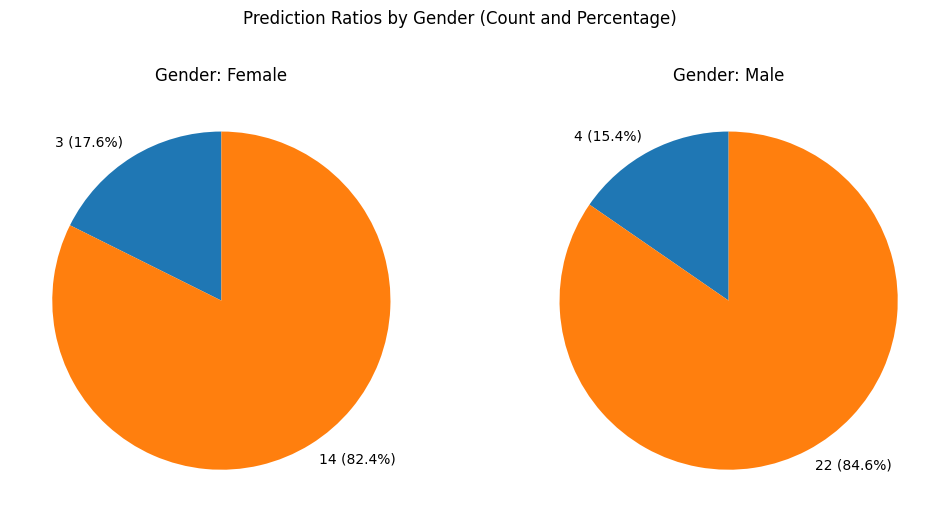

In [ ]:
import matplotlib.pyplot as plt

# Calculate the prediction counts and ratios based on gender
gender_prediction_counts = X_test_prediction_LR['predictions'].groupby(X_test_prediction_LR['gender']).value_counts(normalize=False).unstack(fill_value=0)
gender_prediction_ratios = X_test_prediction_LR['predictions'].groupby(X_test_prediction_LR['gender']).value_counts(normalize=True).unstack(fill_value=0)

# Plotting pie charts for each gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, gender in enumerate(gender_prediction_counts.index):
    counts = gender_prediction_counts.loc[gender]
    ratios = gender_prediction_ratios.loc[gender]
    labels = [f'{count} ({ratio:.1%})' for count, ratio in zip(counts, ratios)]

    axes[i].pie(counts, labels=labels, autopct=None, startangle=90)
    axes[i].set_title(f'Gender: {"Male" if gender == 1 else "Female"}')

plt.suptitle('Prediction Ratios by Gender (Count and Percentage)')
plt.show()


In [ ]:
import pandas as pd
df_original = pd.read_csv('/content/drive/MyDrive/★2024 HCAI EP Conference/1.Utilising LLM/Placement_Data_Full_Class.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

categorical_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_original[col] = le.fit_transform(df_original[col])
    label_encoders[col] = le

df_original['salary'].fillna(0, inplace=True)

In [ ]:
df_original

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
X = df_original.drop(['sl_no', 'status', 'salary'], axis=1)
y_status = df_original['status']
X_train, X_test, y_train_status, y_test_status = train_test_split(X, y_status, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

models_status = {
    # 'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    # 'SVM': SVC(kernel='linear')
}

In [ ]:
from sklearn.metrics import classification_report
for name, model in models_status.items():
    model.fit(X_train, y_train_status)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test_status, predictions)
    print(f'{name} Accuracy: {accuracy:.2f}')

    report = classification_report(y_test_status, predictions)
    print(report)
    print()

Random Forest Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.67      0.50      0.57        12
           1       0.82      0.90      0.86        31

    accuracy                           0.79        43
   macro avg       0.75      0.70      0.72        43
weighted avg       0.78      0.79      0.78        43




In [ ]:
encoding_info = {}
for col, le in label_encoders.items():
    encoding_info[col] = dict(zip(le.classes_, le.transform(le.classes_)))

encoding_info

{'gender': {'F': 0, 'M': 1},
 'ssc_b': {'Central': 0, 'Others': 1},
 'hsc_b': {'Central': 0, 'Others': 1},
 'hsc_s': {'Arts': 0, 'Commerce': 1, 'Science': 2},
 'degree_t': {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2},
 'workex': {'No': 0, 'Yes': 1},
 'specialisation': {'Mkt&Fin': 0, 'Mkt&HR': 1},
 'status': {'Not Placed': 0, 'Placed': 1}}

In [ ]:
## Retraining with synthetic data

In [ ]:
synthetic_data_retrain = synthetic_data_validation.head(6)
synthetic_data_retrain

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,11.0,F,60.0,Central,64.0,Central,Science,66.0,Comm&Mgmt,No,70.0,Mkt&Fin,60.00,Not Placed,0.0
2,11.0,F,72.0,Others,63.0,Central,Science,56.0,Sci&Tech,No,68.0,Mkt&HR,59.69,Placed,218000.0
3,11.0,M,81.0,Central,75.0,Central,Commerce,70.0,Comm&Mgmt,Yes,72.0,Mkt&Fin,62.56,Placed,260000.0
4,11.0,M,69.0,Others,85.0,Others,Science,69.0,Others,No,75.0,Mkt&HR,67.00,Placed,266000.0
5,11.0,F,43.0,Others,62.0,Others,Commerce,65.0,Comm&Mgmt,Yes,76.0,Mkt&Fin,64.74,Not Placed,0.0


In [ ]:
# synthetic_data_retrain = synthetic_data_validation.copy()
# synthetic_data_retrain

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

for column, mapping in encoding_info.items():
    synthetic_data_retrain[column] = synthetic_data_retrain[column].map(mapping)

synthetic_data_retrain['salary'].fillna(0, inplace=True)

<ipython-input-791-caa43836f0c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synthetic_data_retrain[column] = synthetic_data_retrain[column].map(mapping)
<ipython-input-791-caa43836f0c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synthetic_data_retrain[column] = synthetic_data_retrain[column].map(mapping)
<ipython-input-791-caa43836f0c7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [ ]:
synthetic_data_retrain

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80,1,270000.0
1,11.0,0,60.0,0,64.0,0,2,66.0,0,0,70.0,0,60.00,0,0.0
2,11.0,0,72.0,1,63.0,0,2,56.0,2,0,68.0,1,59.69,1,218000.0
3,11.0,1,81.0,0,75.0,0,1,70.0,0,1,72.0,0,62.56,1,260000.0
4,11.0,1,69.0,1,85.0,1,2,69.0,1,0,75.0,1,67.00,1,266000.0
5,11.0,0,43.0,1,62.0,1,1,65.0,0,1,76.0,0,64.74,0,0.0


In [ ]:
synthetic_data_retrain['salary'].fillna(0, inplace=True)

<ipython-input-793-0486fba10e7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synthetic_data_retrain['salary'].fillna(0, inplace=True)


In [ ]:
synthetic_data_retrain

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80,1,270000.0
1,11.0,0,60.0,0,64.0,0,2,66.0,0,0,70.0,0,60.00,0,0.0
2,11.0,0,72.0,1,63.0,0,2,56.0,2,0,68.0,1,59.69,1,218000.0
3,11.0,1,81.0,0,75.0,0,1,70.0,0,1,72.0,0,62.56,1,260000.0
4,11.0,1,69.0,1,85.0,1,2,69.0,1,0,75.0,1,67.00,1,266000.0
5,11.0,0,43.0,1,62.0,1,1,65.0,0,1,76.0,0,64.74,0,0.0


In [ ]:
# Change 'status' to 1 where 'gender' is 0
# synthetic_data_retrain.loc[synthetic_data_retrain['gender'] == 0, 'status'] = 1
# synthetic_data_retrain.loc[synthetic_data_retrain['gender'] == 1, 'status'] = 0

In [ ]:
synthetic_data_retrain

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,11.0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80,1,270000.0
1,11.0,0,60.0,0,64.0,0,2,66.0,0,0,70.0,0,60.00,0,0.0
2,11.0,0,72.0,1,63.0,0,2,56.0,2,0,68.0,1,59.69,1,218000.0
3,11.0,1,81.0,0,75.0,0,1,70.0,0,1,72.0,0,62.56,1,260000.0
4,11.0,1,69.0,1,85.0,1,2,69.0,1,0,75.0,1,67.00,1,266000.0
5,11.0,0,43.0,1,62.0,1,1,65.0,0,1,76.0,0,64.74,0,0.0


In [ ]:
X_synthetic_data_retrain = synthetic_data_retrain.drop(['sl_no', 'status', 'salary'], axis=1)
y_status_X_synthetic_data_retrain = synthetic_data_retrain['status']

In [ ]:
X_synthetic_data_retrain

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.80
1,0,60.0,0,64.0,0,2,66.0,0,0,70.0,0,60.00
2,0,72.0,1,63.0,0,2,56.0,2,0,68.0,1,59.69
3,1,81.0,0,75.0,0,1,70.0,0,1,72.0,0,62.56
4,1,69.0,1,85.0,1,2,69.0,1,0,75.0,1,67.00
5,0,43.0,1,62.0,1,1,65.0,0,1,76.0,0,64.74


In [ ]:
y_status_X_synthetic_data_retrain

,status
0,1
1,0
2,1
3,1
4,1
5,0


In [ ]:
from sklearn.metrics import classification_report
for name, model in models_status.items():
    model.fit(X_synthetic_data_retrain, y_status_X_synthetic_data_retrain)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test_status, predictions)
    print(f'{name} Accuracy: {accuracy:.2f}')

    report = classification_report(y_test_status, predictions)
    print(report)
    print()

Random Forest Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.81      0.84      0.83        31

    accuracy                           0.74        43
   macro avg       0.68      0.67      0.67        43
weighted avg       0.74      0.74      0.74        43




In [ ]:
X_test.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
200,1,69.0,1,60.0,1,1,65.0,0,0,87.55,0,52.81
212,1,67.0,1,67.0,1,1,73.0,0,1,59.00,0,69.72
138,0,82.0,1,64.0,1,2,73.0,2,1,96.00,0,71.77
176,0,59.0,0,60.0,1,1,56.0,0,0,55.00,1,57.90
15,0,65.0,0,75.0,0,1,69.0,0,1,72.00,0,64.66


In [ ]:
predictions

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
len(X_test)

43

In [ ]:
len(predictions)

43

In [ ]:
X_test_prediction_LR = X_test.copy()

In [ ]:
X_test_prediction_LR['predictions'] = predictions

In [ ]:
X_test_prediction_LR.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,predictions
200,1,69.0,1,60.0,1,1,65.0,0,0,87.55,0,52.81,1
212,1,67.0,1,67.0,1,1,73.0,0,1,59.00,0,69.72,1
138,0,82.0,1,64.0,1,2,73.0,2,1,96.00,0,71.77,1
176,0,59.0,0,60.0,1,1,56.0,0,0,55.00,1,57.90,0
15,0,65.0,0,75.0,0,1,69.0,0,1,72.00,0,64.66,1


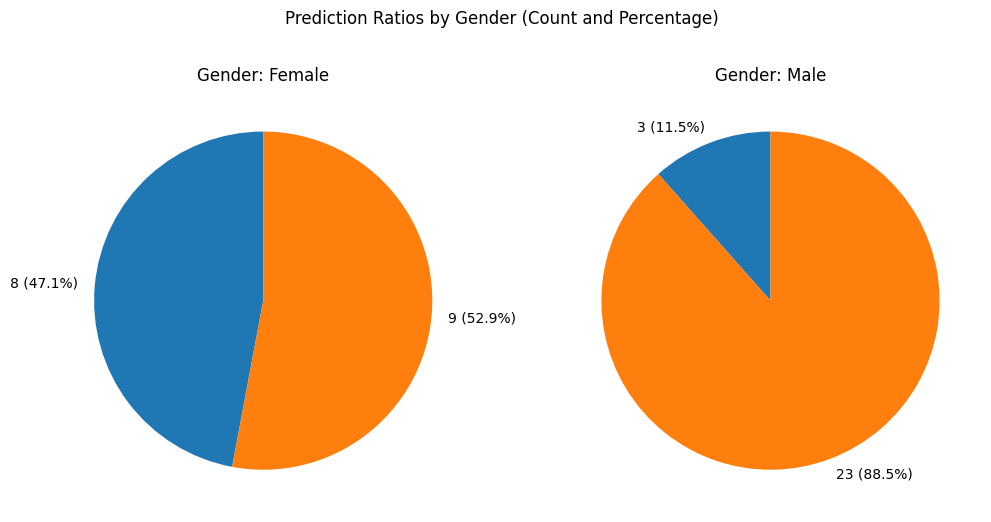

In [ ]:
import matplotlib.pyplot as plt

# Calculate the prediction counts and ratios based on gender
gender_prediction_counts = X_test_prediction_LR['predictions'].groupby(X_test_prediction_LR['gender']).value_counts(normalize=False).unstack(fill_value=0)
gender_prediction_ratios = X_test_prediction_LR['predictions'].groupby(X_test_prediction_LR['gender']).value_counts(normalize=True).unstack(fill_value=0)

# Plotting pie charts for each gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, gender in enumerate(gender_prediction_counts.index):
    counts = gender_prediction_counts.loc[gender]
    ratios = gender_prediction_ratios.loc[gender]
    labels = [f'{count} ({ratio:.1%})' for count, ratio in zip(counts, ratios)]

    axes[i].pie(counts, labels=labels, autopct=None, startangle=90)
    axes[i].set_title(f'Gender: {"Male" if gender == 1 else "Female"}')

plt.suptitle('Prediction Ratios by Gender (Count and Percentage)')
plt.show()
